## Install Packages

In [2]:
import geopandas as gpd
import pandas as pd
import shapely
import pyproj
from geopandas.tools import sjoin
from shapely.geometry import Point, LineString
from math import radians, sin, cos, sqrt, atan2, asin, atan

print("All packages are working!")


All packages are working!


## Dowload polyline data

In [3]:

# Path to your shapefile
file_path = r"D:\Decarbonization Project\road1"
polyline_data = gpd.read_file(file_path,encoding='latin1')

# Rename columns using their current index or name
polyline_data.rename(columns={
    polyline_data.columns[2]: 'road_number',  # Rename column index 3
    polyline_data.columns[3]: 'control',
    polyline_data.columns[5]: 'km_start',      # Rename column index 4
    polyline_data.columns[6]: 'km_end',      # Rename column index 4
    polyline_data.columns[7]: 'distance'     # Rename column index 8
}, inplace=True)


# Verify the changes
columns_to_keep = [0, 1, 2, 3,5,6, 7, -1]  # Use -1 for the last column
polyline_data = polyline_data.iloc[:, columns_to_keep]

# Verify the updated DataFrame
polyline_data.head()
polyline_data.info
polyline_data

,id,section_pa,road_number,control,km_start,km_end,distance,geometry
0,305,5553,36,101,0+000,10+000,10,"LINESTRING (709309.55 1438227.317, 709491.064 ..."
1,2320,238,3510,100,0+000,25+921,25.921,"LINESTRING (570954.517 1469333.105, 570966.824..."
2,2189,10236,3333,102,18+462,34+167,15.705,"LINESTRING (705354.224 1646180.743, 705354.478..."
3,311,965,37,200,23+482,47+468,23.986,"LINESTRING (593264.76 1395498.21, 593269.299 1..."
4,2706,10121,4110,101,48+478,48+512,0.034,"LINESTRING (540272.057 917613.113, 540274.013 ..."
...,...,...,...,...,...,...,...,...
2961,133,11621,6,200,71+250,86+600,15.35,"LINESTRING (725956.272 1616062.127, 725991.824..."
2962,147,6325,7,102,0+000,0+512,0.512,"LINESTRING (690372.704 1518626.122, 690372.693..."
2963,640,11502,290,102,93+196,110+736,17.54,"LINESTRING (829006.967 1642440.253, 828992.601..."
2964,1317,5001,1400,100,0+000,4+829,4.829,"LINESTRING (513541.151 1866859.686, 513513.795..."


Dowloade polyline aj pongsun com

In [4]:
# file_path = r"C:\Users\SeniorProject\Documents\Nutt Dew\Decarbonization Project-20250417T055818Z-001\Decarbonization Project\road1"
# polyline_data = gpd.read_file(file_path, encoding='latin1')

# polyline_data.rename(columns={
#     polyline_data.columns[2]: 'road_number',
#     polyline_data.columns[3]: 'control',
#     polyline_data.columns[5]: 'km_start',
#     polyline_data.columns[6]: 'km_end',
#     polyline_data.columns[7]: 'distance'
# }, inplace=True)

# columns_to_keep = [0, 1, 2, 3, 5, 6, 7, -1]
# polyline_data = polyline_data.iloc[:, columns_to_keep]

# polyline_data.head()
# polyline_data.info


In [10]:
# Calculate the mean of the 'distance' column
#polyline_data['distance'] = pd.to_numeric(polyline_data['distance'], errors='coerce')
#mean_distance = polyline_data['distance'].mean()
# Print the result
#print(f"The mean distance is: {mean_distance}")
polyline_data.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           2966 non-null   object  
 1   section_pa   2966 non-null   object  
 2   road_number  2966 non-null   object  
 3   control      2966 non-null   object  
 4   km_start     2966 non-null   object  
 5   km_end       2966 non-null   object  
 6   distance     2966 non-null   object  
 7   geometry     2966 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 185.5+ KB


## dowload gps data

GPS data on aj pongsun com

In [ ]:

#Read the CSV without header and remove BOM
#gps_data = pd.read_csv(r"C:\Users\SeniorProject\Documents\DCB Project\After SQL OD data\result_grid_clean_data100m(หลังกรอง noise ออก).csv",
                # header=None,
                # encoding='utf-8-sig')

# Rename columns manually
#gps_data.columns = ['trip_id', 'uts_ts', 'lat', 'lon', 'OD']

#(gps_data.head())


### Add Geometry_point  Column

In [5]:
# Read the CSV without header and remove 
# Step 1: Load GPS data from CSV

gps_data = pd.read_csv(r"D:\Decarbonization Project\1.3รวมไป-กลับ_result_grid_clean_data100m(หลังกรอง noise ออก).csv",
                 header=None,
                 encoding='utf-8-sig')
gps_data
gps_data.columns = ['trip_id', 'timestamp', 'lat', 'lon', 'OD', 'trip_Count', 'trip_name','start','end)']
gps_data.info()
print("GPS data uploaded")
gps_data
# Step 2: Transform coordinates to a NumPy array
coordinates_array = gps_data[['lat', 'lon']].to_numpy()
print("Coordinates as Array:")
print(coordinates_array)

# Step 3: Create Point geometries from lat/lon
geometry = [Point(xy) for xy in zip(gps_data['lon'], gps_data['lat'])]

# Step 4: Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(gps_data, crs="EPSG:4326", geometry=geometry)  # EPSG:4326 is WGS 84 (latitude/longitude)

# Step 5: (Optional) Transform CRS to UTM (e.g., EPSG:32647 for WGS 84 UTM Zone 47N)
gdf_utm = gdf.to_crs("EPSG:32647")  # Change to your desired CRS

# Step 6: Print results
print("GeoDataFrame with WGS 84:")
print(gdf.head())
print("\nGeoDataFrame with UTM (EPSG:32647):")
print(gdf_utm.head())

traj = gdf_utm['geometry'].to_numpy()
traj
gdf_utm

#Check UNIT
print(polyline_data.crs)
polyline_data = polyline_data.to_crs("EPSG:32647")
print("changed to",polyline_data.crs)
gdf_utm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44497 entries, 0 to 44496
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   trip_id     44497 non-null  object 
 1   timestamp   44497 non-null  object 
 2   lat         44497 non-null  float64
 3   lon         44497 non-null  float64
 4   OD          44497 non-null  object 
 5   trip_Count  44497 non-null  int64  
 6   trip_name   44497 non-null  object 
 7   start       44497 non-null  object 
 8   end)        44497 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB
GPS data uploaded
Coordinates as Array:
[[ 13.613468  101.32919  ]
 [ 13.617197  101.32467  ]
 [ 13.61981   101.317    ]
 ...
 [ 13.109635  100.929518 ]
 [ 13.10565   100.920946 ]
 [ 13.0963555 100.8968695]]
GeoDataFrame with WGS 84:
                       trip_id                timestamp        lat  \
0  001000500000000196800100732  2024-11-01 06:21:49.000  13.613468   
1  00

,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry
0,001000500000000196800100732,2024-11-01 06:21:49.000,13.613468,101.329190,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (752007.902 1506184.59)
1,001000500000000196800100732,2024-11-01 06:22:28.000,13.617197,101.324670,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (751514.674 1506592.611)
2,001000500000000196800100732,2024-11-01 06:24:29.000,13.619810,101.317000,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (750681.667 1506873.876)
3,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91)
4,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009)
...,...,...,...,...,...,...,...,...,...,...
44492,196000300000860503075482655,2024-11-01 19:42:39.000,13.113491,100.962670,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (712775.065 1450513.381)
44493,196000300000860503075482655,2024-11-01 19:43:40.000,13.111698,100.953498,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (711781.905 1450307.278)
44494,196000300000860503075482655,2024-11-01 19:46:41.000,13.109635,100.929518,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (709183.045 1450059.021)
44495,196000300000860503075482655,2024-11-01 19:47:42.000,13.105650,100.920946,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (708256.775 1449611.02)


# 

## Road ID Matching

#### use sjoin_nearest

In [6]:
matched_gps_route = gpd.sjoin_nearest(gdf_utm, polyline_data, max_distance = 40, distance_col="dist") #max_distance = 
matched_gps_route.reset_index(drop=True, inplace=True)
matched_gps_route.head()

,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry,index_right,id,section_pa,road_number,control,km_start,km_end,distance,dist
0,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91),262,741,11354,331,301,106+700,128+400,21.7,10.131744
1,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009),262,741,11354,331,301,106+700,128+400,21.7,12.053146
2,001000500000000196800100732,2024-11-01 06:28:46.000,13.605307,101.303840,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749272.365 1505255.271),262,741,11354,331,301,106+700,128+400,21.7,11.480537
3,001000500000000196800100732,2024-11-01 06:29:30.000,13.598559,101.299934,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (748856.591 1504504.463),262,741,11354,331,301,106+700,128+400,21.7,9.819239
4,001000500000000196800100732,2024-11-01 06:30:29.000,13.591763,101.295930,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (748430.232 1503748.254),262,741,11354,331,301,106+700,128+400,21.7,11.131576


In [7]:
import pandas as pd
from collections import Counter

def smooth_and_filter_road_ids(df, window_size=5):
    def filter_single_trip(trip_df):
        ids = trip_df['id'].tolist()
        smoothed_ids = []
                                                        
        for i in range(len(ids)):
            start = max(0, i - window_size // 2)
            end = min(len(ids), i + window_size // 2 + 1)
            window = ids[start:end]
            most_common = Counter(window).most_common(1)[0][0]
            smoothed_ids.append(most_common)

        # Keep only rows where road_id matches the smoothed value
        trip_df = trip_df.reset_index(drop=True)
        trip_df['smoothed'] = smoothed_ids
        return trip_df[trip_df['id'] == trip_df['smoothed']].drop(columns=['smoothed'])

    # Apply per trip
    return df.groupby('trip_id', group_keys=False).apply(filter_single_trip)

matched_gps_route = smooth_and_filter_road_ids(matched_gps_route, window_size=5)
matched_gps_route.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\2641367006.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('trip_id', group_keys=False).apply(filter_single_trip)


,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry,index_right,id,section_pa,road_number,control,km_start,km_end,distance,dist
0,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91),262,741,11354,331,301,106+700,128+400,21.7,10.131744
1,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009),262,741,11354,331,301,106+700,128+400,21.7,12.053146
2,001000500000000196800100732,2024-11-01 06:28:46.000,13.605307,101.303840,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749272.365 1505255.271),262,741,11354,331,301,106+700,128+400,21.7,11.480537
3,001000500000000196800100732,2024-11-01 06:29:30.000,13.598559,101.299934,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (748856.591 1504504.463),262,741,11354,331,301,106+700,128+400,21.7,9.819239
4,001000500000000196800100732,2024-11-01 06:30:29.000,13.591763,101.295930,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (748430.232 1503748.254),262,741,11354,331,301,106+700,128+400,21.7,11.131576


In [8]:
# Count how many times each 'id' appears within each 'trip_id'
id_counts_per_trip = matched_gps_route.groupby('trip_id')['id'].value_counts().reset_index(name='count')

# Display the result
sorted_df = id_counts_per_trip.sort_values(by=id_counts_per_trip.columns[2])
sorted_df
# Step 1: Sort by the third column (index 2)
sorted_df = id_counts_per_trip.sort_values(by=id_counts_per_trip.columns[2])

# Step 2: Bin the values in that column
bins = [0, 5,10, 20, 30, float('inf')]
labels = ['0–5','5-10', '10–20', '20–30', '30+']

# Create a new column for bin categories
sorted_df['range'] = pd.cut(sorted_df.iloc[:, 2], bins=bins, labels=labels, right=False)

# Step 3: Count how many fall into each range
range_counts = sorted_df['range'].value_counts().sort_index()

# Print result
print(range_counts)

range
0–5      1039
5-10      839
10–20     754
20–30     270
30+       209
Name: count, dtype: int64


In [9]:
# Step 1: Count how many times each 'id' appears within each 'trip_id'
id_counts = matched_gps_route.groupby(['trip_id', 'id']).size().reset_index(name='count')

# Step 2: Keep only (trip_id, id) combinations where count >= 5
valid_ids = id_counts[id_counts['count'] >= 3][['trip_id', 'id']]

# Step 3: Filter the original DataFrame using these valid (trip_id, id) pairs
matched_gps_route = matched_gps_route.merge(valid_ids, on=['trip_id', 'id'], how='inner')

# Result
matched_gps_route.head()

,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry,index_right,id,section_pa,road_number,control,km_start,km_end,distance,dist
0,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91),262,741,11354,331,301,106+700,128+400,21.7,10.131744
1,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009),262,741,11354,331,301,106+700,128+400,21.7,12.053146
2,001000500000000196800100732,2024-11-01 06:28:46.000,13.605307,101.303840,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749272.365 1505255.271),262,741,11354,331,301,106+700,128+400,21.7,11.480537
3,001000500000000196800100732,2024-11-01 06:29:30.000,13.598559,101.299934,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (748856.591 1504504.463),262,741,11354,331,301,106+700,128+400,21.7,9.819239
4,001000500000000196800100732,2024-11-01 06:30:29.000,13.591763,101.295930,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (748430.232 1503748.254),262,741,11354,331,301,106+700,128+400,21.7,11.131576


In [10]:
pd.reset_option('all')  # Show all columns in the DataFrame

C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\1198001646.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')  # Show all columns in the DataFrame
C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\1198001646.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')  # Show all columns in the DataFrame


In [11]:
#pd.set_option('display.max_rows', None)  # แสดงทุกแถว
#pd.reset_option('all')



In [12]:
grouped_data = matched_gps_route.groupby('trip_name').agg({
    'id': lambda x: sorted(set(map(str, x))),
    'section_pa': lambda x: sorted(set(map(str, x))),
    'road_number': lambda x: sorted(set(map(str, x))),
    'control': lambda x: sorted(set(map(str, x))),
    'distance': lambda x: sorted(set(map(str, x))),
    'km_start': lambda x: sorted(set(map(str, x))),
    'km_end': lambda x: sorted(set(map(str, x))),
    'OD': lambda x: sorted(set(map(str, x))),
}).reset_index()
grouped_data

,trip_name,id,section_pa,road_number,control,distance,km_start,km_end,OD
0,001000500000000196800100732-1,"[736, 737, 739, 740, 741]","[10214, 11354, 3796, 5550, 6114]",[331],"[102, 103, 201, 202, 301]","[21.3, 21.7, 30.3, 41, 8.1]","[106+700, 47+000, 6+000, 68+300, 76+400]","[106+700, 128+400, 47+000, 68+300, 76+400]",[Gateway City Industrial Estate - Laem Chabang...
1,001000600000010090400000694-1,"[150, 153, 154, 2406, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 5601, 6203, 6...","[34, 361, 3611, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955,...","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+9...",[Laem Chabang Port - Wellgrow Industrial Estate]
2,001000800000010140300000015-1,"[150, 153, 154, 2467, 298, 299, 697, 698, 807]","[11313, 11572, 5490, 5548, 5570, 5585, 6207, 6...","[314, 34, 361, 3701, 7]","[100, 101, 102, 105, 108, 109, 200, 300, 400]","[13.025, 14.216, 17.3, 3.728, 32.2, 36.4, 5.95...","[0+000, 35+600, 52+900, 7+475, 77+800, 80+144]","[110+000, 116+544, 14+216, 20+500, 3+728, 52+9...",[Wellgrow Industrial Estate - Laem Chabang Port]
3,001000800000010140300000015-2,"[149, 150, 154, 2156, 2491, 2496, 2507, 697, 6...","[11354, 11570, 11572, 5490, 5558, 5567, 5585, ...","[314, 3304, 331, 3702, 7]","[100, 101, 102, 104, 105, 109, 200, 301, 400]","[13.025, 20.279, 21.7, 3.795, 3.824, 32.2, 36....","[0+000, 106+700, 39+000, 48+205, 52+000, 7+475...","[110+000, 116+544, 128+400, 20+279, 20+500, 52...",[Laem Chabang Port - Gateway City Industrial E...
4,001000800000010853300000004-1,"[150, 153, 154, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 6203, 6294, 6...","[34, 361, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955,...","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+9...",[Laem Chabang Port - Wellgrow Industrial Estate]
...,...,...,...,...,...,...,...,...,...
322,196000100000000153220713403-1,"[150, 153, 154, 157, 2507, 2510, 2540, 296, 29...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3702, 3901, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2....","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 116+544, 14+216, 14+660, 14+900, 19+...",[Laem Chabang Port - Samut Sakhon Industrial E...
323,196000100000000153220713403-2,"[150, 153, 154, 157, 2467, 2571, 296, 297, 298...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3701, 3902, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2....","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 116+544, 14+216, 14+660, 14+900, 19+...",[Samut Sakhon Industrial Estate - Laem Chabang...
324,196000100000000153221014352-1,"[149, 154, 164, 2426, 2428, 2445, 2447, 2467, ...","[10104, 10386, 11570, 11576, 2320, 2741, 2743,...","[3, 32, 3701, 3901, 3902, 7, 9]","[100, 101, 104, 109, 200, 400, 402, 500, 601, ...","[10.556, 14, 18.14, 19.7, 2.596, 3.308, 36.4, ...","[0+000, 11+339, 119+500, 13+118, 22+619, 30+60...","[10+526, 116+544, 137+640, 14+000, 20+371, 21+...",[Bang Pa-in Industrial Estate - Laem Chabang P...
325,196000300000860503075482655-1,"[150, 153, 154, 2510, 296, 297, 298, 299, 300,...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3901, 7]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 20...","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 14+216, 14+660, 14+900, 19+972, 3+72...",[Laem Chabang Port - Samut Sakhon Industrial E...


# จำนวนรถที่วิ่งในแต่ละ OD

In [13]:
# ดึงค่า string ออกจาก list
grouped_data['OD'] = grouped_data['OD'].apply(lambda x: x[0] if isinstance(x, list) else x)
pd.Series(grouped_data['OD'].unique())
grouped_data['OD'].value_counts()



OD
Wellgrow Industrial Estate - Laem Chabang Port        80
Laem Chabang Port - Wellgrow Industrial Estate        75
Gateway City Industrial Estate - Laem Chabang Port    57
Laem Chabang Port - Gateway City Industrial Estate    39
Samut Sakhon Industrial Estate - Laem Chabang Port    17
Laem Chabang Port - Samut Sakhon Industrial Estate    15
Laem Chabang Port - Hi-Tech Industrial Estate          9
Bang Pa-in Industrial Estate - Laem Chabang Port       8
TFD Industrial Estate - Laem Chabang Port              6
Sinsakhon Industrial Estate - Laem Chabang Port        5
Laem Chabang Port - Sinsakhon Industrial Estate        5
Hi-Tech Industrial Estate - Laem Chabang Port          4
Laem Chabang Port - TFD Industrial Estate              3
Laem Chabang Port - TFD Industrial Estate 2            2
TFD Industrial Estate 2 - Laem Chabang Port            1
Laem Chabang Port - Bang Pa-in Industrial Estate       1
Name: count, dtype: int64

### Result from sjoin_nearest algorithm

#### routes of traveling

#### total distance

In [14]:
grouped_data

,trip_name,id,section_pa,road_number,control,distance,km_start,km_end,OD
0,001000500000000196800100732-1,"[736, 737, 739, 740, 741]","[10214, 11354, 3796, 5550, 6114]",[331],"[102, 103, 201, 202, 301]","[21.3, 21.7, 30.3, 41, 8.1]","[106+700, 47+000, 6+000, 68+300, 76+400]","[106+700, 128+400, 47+000, 68+300, 76+400]",Gateway City Industrial Estate - Laem Chabang ...
1,001000600000010090400000694-1,"[150, 153, 154, 2406, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 5601, 6203, 6...","[34, 361, 3611, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955,...","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+9...",Laem Chabang Port - Wellgrow Industrial Estate
2,001000800000010140300000015-1,"[150, 153, 154, 2467, 298, 299, 697, 698, 807]","[11313, 11572, 5490, 5548, 5570, 5585, 6207, 6...","[314, 34, 361, 3701, 7]","[100, 101, 102, 105, 108, 109, 200, 300, 400]","[13.025, 14.216, 17.3, 3.728, 32.2, 36.4, 5.95...","[0+000, 35+600, 52+900, 7+475, 77+800, 80+144]","[110+000, 116+544, 14+216, 20+500, 3+728, 52+9...",Wellgrow Industrial Estate - Laem Chabang Port
3,001000800000010140300000015-2,"[149, 150, 154, 2156, 2491, 2496, 2507, 697, 6...","[11354, 11570, 11572, 5490, 5558, 5567, 5585, ...","[314, 3304, 331, 3702, 7]","[100, 101, 102, 104, 105, 109, 200, 301, 400]","[13.025, 20.279, 21.7, 3.795, 3.824, 32.2, 36....","[0+000, 106+700, 39+000, 48+205, 52+000, 7+475...","[110+000, 116+544, 128+400, 20+279, 20+500, 52...",Laem Chabang Port - Gateway City Industrial Es...
4,001000800000010853300000004-1,"[150, 153, 154, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 6203, 6294, 6...","[34, 361, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955,...","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+9...",Laem Chabang Port - Wellgrow Industrial Estate
...,...,...,...,...,...,...,...,...,...
322,196000100000000153220713403-1,"[150, 153, 154, 157, 2507, 2510, 2540, 296, 29...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3702, 3901, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2....","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 116+544, 14+216, 14+660, 14+900, 19+...",Laem Chabang Port - Samut Sakhon Industrial Es...
323,196000100000000153220713403-2,"[150, 153, 154, 157, 2467, 2571, 296, 297, 298...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3701, 3902, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2....","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 116+544, 14+216, 14+660, 14+900, 19+...",Samut Sakhon Industrial Estate - Laem Chabang ...
324,196000100000000153221014352-1,"[149, 154, 164, 2426, 2428, 2445, 2447, 2467, ...","[10104, 10386, 11570, 11576, 2320, 2741, 2743,...","[3, 32, 3701, 3901, 3902, 7, 9]","[100, 101, 104, 109, 200, 400, 402, 500, 601, ...","[10.556, 14, 18.14, 19.7, 2.596, 3.308, 36.4, ...","[0+000, 11+339, 119+500, 13+118, 22+619, 30+60...","[10+526, 116+544, 137+640, 14+000, 20+371, 21+...",Bang Pa-in Industrial Estate - Laem Chabang Port
325,196000300000860503075482655-1,"[150, 153, 154, 2510, 296, 297, 298, 299, 300,...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3901, 7]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 20...","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 14+216, 14+660, 14+900, 19+972, 3+72...",Laem Chabang Port - Samut Sakhon Industrial Es...


In [15]:
def sum_distance_list(distance_val):
    if isinstance(distance_val, list):
        try:
            return sum(float(x) for x in distance_val)
        except Exception:
            return None
    return None

# Apply to the DataFrame
grouped_data['total_distance'] = grouped_data['distance'].apply(sum_distance_list)

# Optional: Display the result
total_dist_truck = grouped_data
total_dist_truck

,trip_name,id,section_pa,road_number,control,distance,km_start,km_end,OD,total_distance
0,001000500000000196800100732-1,"[736, 737, 739, 740, 741]","[10214, 11354, 3796, 5550, 6114]",[331],"[102, 103, 201, 202, 301]","[21.3, 21.7, 30.3, 41, 8.1]","[106+700, 47+000, 6+000, 68+300, 76+400]","[106+700, 128+400, 47+000, 68+300, 76+400]",Gateway City Industrial Estate - Laem Chabang ...,122.400
1,001000600000010090400000694-1,"[150, 153, 154, 2406, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 5601, 6203, 6...","[34, 361, 3611, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955,...","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+9...",Laem Chabang Port - Wellgrow Industrial Estate,146.290
2,001000800000010140300000015-1,"[150, 153, 154, 2467, 298, 299, 697, 698, 807]","[11313, 11572, 5490, 5548, 5570, 5585, 6207, 6...","[314, 34, 361, 3701, 7]","[100, 101, 102, 105, 108, 109, 200, 300, 400]","[13.025, 14.216, 17.3, 3.728, 32.2, 36.4, 5.95...","[0+000, 35+600, 52+900, 7+475, 77+800, 80+144]","[110+000, 116+544, 14+216, 20+500, 3+728, 52+9...",Wellgrow Industrial Estate - Laem Chabang Port,138.390
3,001000800000010140300000015-2,"[149, 150, 154, 2156, 2491, 2496, 2507, 697, 6...","[11354, 11570, 11572, 5490, 5558, 5567, 5585, ...","[314, 3304, 331, 3702, 7]","[100, 101, 102, 104, 105, 109, 200, 301, 400]","[13.025, 20.279, 21.7, 3.795, 3.824, 32.2, 36....","[0+000, 106+700, 39+000, 48+205, 52+000, 7+475...","[110+000, 116+544, 128+400, 20+279, 20+500, 52...",Laem Chabang Port - Gateway City Industrial Es...,185.589
4,001000800000010853300000004-1,"[150, 153, 154, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 6203, 6294, 6...","[34, 361, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955,...","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+9...",Laem Chabang Port - Wellgrow Industrial Estate,138.590
...,...,...,...,...,...,...,...,...,...,...
322,196000100000000153220713403-1,"[150, 153, 154, 157, 2507, 2510, 2540, 296, 29...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3702, 3901, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2....","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 116+544, 14+216, 14+660, 14+900, 19+...",Laem Chabang Port - Samut Sakhon Industrial Es...,230.162
323,196000100000000153220713403-2,"[150, 153, 154, 157, 2467, 2571, 296, 297, 298...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3701, 3902, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2....","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 116+544, 14+216, 14+660, 14+900, 19+...",Samut Sakhon Industrial Estate - Laem Chabang ...,230.162
324,196000100000000153221014352-1,"[149, 154, 164, 2426, 2428, 2445, 2447, 2467, ...","[10104, 10386, 11570, 11576, 2320, 2741, 2743,...","[3, 32, 3701, 3901, 3902, 7, 9]","[100, 101, 104, 109, 200, 400, 402, 500, 601, ...","[10.556, 14, 18.14, 19.7, 2.596, 3.308, 36.4, ...","[0+000, 11+339, 119+500, 13+118, 22+619, 30+60...","[10+526, 116+544, 137+640, 14+000, 20+371, 21+...",Bang Pa-in Industrial Estate - Laem Chabang Port,190.847
325,196000300000860503075482655-1,"[150, 153, 154, 2510, 296, 297, 298, 299, 300,...","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5...","[34, 35, 361, 3901, 7]","[100, 101, 102, 105, 108, 109, 200, 201, 202, ...","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 20...","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900...","[110+000, 14+216, 14+660, 14+900, 19+972, 3+72...",Laem Chabang Port - Samut Sakhon Industrial Es...,190.937


In [16]:
import pandas as pd

# Stop truncating long list values
pd.set_option('display.max_colwidth', None)

# Now print will show the full arrays
#print(total_dist_truck['distance'])

#print(total_dist_truck['id'])
# Check if the number of elements in 'id' and 'distance' lists are the same
grouped_data['same_length'] = grouped_data.apply(
    lambda row: len(row['id']) == len(row['distance']) 
    if isinstance(row['id'], list) and isinstance(row['distance'], list) 
    else False,
    axis=1
)

# Print rows where they do NOT match
mismatched_rows = grouped_data[~grouped_data['same_length']]

#print("Rows where 'id' and 'distance' have different number of elements:")
#(mismatched_rows[['id', 'distance']])


## ระยะทางที่หาจากการใช้ผลความยาวของRoadID ที่วิ่งทั้งหมด ในแต่ละOD

In [17]:
# Group by 'OD' and calculate the average of 'total_distance'
average_distance_per_od = grouped_data.groupby('OD')['total_distance'].mean().reset_index()

# Optional: Rename column for clarity
average_distance_per_od.rename(columns={'total_distance': 'avg_total_distance'}, inplace=True)

# Display the result
(average_distance_per_od)


,OD,avg_total_distance
0,Bang Pa-in Industrial Estate - Laem Chabang Port,235.216875
1,Gateway City Industrial Estate - Laem Chabang Port,126.548105
2,Hi-Tech Industrial Estate - Laem Chabang Port,277.713250
3,Laem Chabang Port - Bang Pa-in Industrial Estate,257.951000
4,Laem Chabang Port - Gateway City Industrial Estate,130.493308
5,Laem Chabang Port - Hi-Tech Industrial Estate,233.811778
6,Laem Chabang Port - Samut Sakhon Industrial Estate,212.749933
7,Laem Chabang Port - Sinsakhon Industrial Estate,200.756400
8,Laem Chabang Port - TFD Industrial Estate,114.370667
9,Laem Chabang Port - TFD Industrial Estate 2,152.890500


# 2) Routes Classification

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

df1 =total_dist_truck[['trip_name','id','OD']]

# Step 2: Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(df1['id']),
                       columns=[f"id_{x}" for x in mlb.classes_],
                       index=df1.index)


# Step 3: Combine the one-hot columns back to the original dataframe
df1_encoded = pd.concat([df1.drop(columns=['id']),one_hot], axis=1)

# Step 4 (optional): Save or preview
df1_encoded.head() 


,trip_name,OD,id_146,id_148,id_149,id_150,id_152,id_153,id_154,id_157,...,id_741,id_766,id_767,id_771,id_772,id_773,id_774,id_807,id_813,id_818
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,001000600000010090400000694-1,Laem Chabang Port - Wellgrow Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,001000800000010140300000015-1,Wellgrow Industrial Estate - Laem Chabang Port,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,001000800000010140300000015-2,Laem Chabang Port - Gateway City Industrial Estate,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,001000800000010853300000004-1,Laem Chabang Port - Wellgrow Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
unique_od = df1_encoded['OD'].unique()
unique_od


array(['Gateway City Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Wellgrow Industrial Estate',
       'Wellgrow Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Gateway City Industrial Estate',
       'Samut Sakhon Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Hi-Tech Industrial Estate',
       'Laem Chabang Port - Samut Sakhon Industrial Estate',
       'Sinsakhon Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - TFD Industrial Estate',
       'Bang Pa-in Industrial Estate - Laem Chabang Port',
       'TFD Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Sinsakhon Industrial Estate',
       'Hi-Tech Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - TFD Industrial Estate 2',
       'TFD Industrial Estate 2 - Laem Chabang Port',
       'Laem Chabang Port - Bang Pa-in Industrial Estate'], dtype=object)

In [36]:
# Descriptive variable names based on the OD pairs
gateway_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Gateway City Industrial Estate - Laem Chabang Port']
laem_chabang_to_wellgrow = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - Wellgrow Industrial Estate']
laem_chabang_to_gateway = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - Gateway City Industrial Estate']
wellgrow_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Wellgrow Industrial Estate - Laem Chabang Port']
samut_sakhon_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Samut Sakhon Industrial Estate - Laem Chabang Port']
laem_chabang_to_hitech = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - Hi-Tech Industrial Estate']
sinsakhon_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Sinsakhon Industrial Estate - Laem Chabang Port']
bang_pa_in_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Bang Pa-in Industrial Estate - Laem Chabang Port']
laem_chabang_to_tfd = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - TFD Industrial Estate']
tfd_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'TFD Industrial Estate - Laem Chabang Port']
tfd2_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'TFD Industrial Estate 2 - Laem Chabang Port']
laem_chabang_to_samut_sakhon = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - Samut Sakhon Industrial Estate']
laem_chabang_to_sinsakhon = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - Sinsakhon Industrial Estate']
hi_tech_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Hi-Tech Industrial Estate - Laem Chabang Port']
laem_chabang_to_tfd2 = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - TFD Industrial Estate 2']
laem_chabang_to_bang_pa_in = df1_encoded[df1_encoded['OD'] == 'Laem Chabang Port - Bang Pa-in Industrial Estate']

## 2.1 Algorithm to find truck routes using the concept of similarity. (Jascard Score)



### โหลดข้อมูล road_id ของแต่ละเส้นทางตามที่GPS Suggest

In [50]:
import pandas as pd
import ast
#r"D:\Decarbonization Project\road1"
# โหลดข้อมูล
df1 =  df1_encoded
routes_df = pd.read_excel(r"C:\Users\Admin\Downloads\final_cleaned_routes_data (1).xlsx")
routes_df.head()


,OD,Route,ID_List,Dist
0,Wellgrow Industrial Estate - Laem Chabang Port,via 7,"[154, 150, 149]",76.7
1,Wellgrow Industrial Estate - Laem Chabang Port,via 34,"[153, 3701, 2404, 807, 299, 298]",63.5
2,Wellgrow Industrial Estate - Laem Chabang Port,via 3,"[2447, 697, 298, 299, 68, 69, 70, 71]",63.5
3,Gateway City Industrial Estate - Laem Chabang Port,via 331,"[741, 154, 738, 737, 739, 740]",100.0
4,Gateway City Industrial Estate - Laem Chabang Port,via 7,"[741, 2156, 699, 701, 700, 149, 150, 154]",94.3


### Apply Algorithm

In [38]:
import pandas as pd
from sklearn.metrics import jaccard_score
import ast  # To safely convert string representations to actual lists

# Convert stored string lists to actual Python lists
routes_df["ID_List"] = routes_df["ID_List"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Ensure all elements inside ID_List are integers
routes_df["ID_List"] = routes_df["ID_List"].apply(lambda x: [int(i) for i in x])

def classify_trips(df, routes_df, od_pair):
    """
    Classifies trips for a specific OD pair based on predefined route ID lists using Jaccard similarity.

    Args:
        df (pd.DataFrame): Trip data with road ID columns.
        routes_df (pd.DataFrame): DataFrame containing predefined routes for each OD.
        od_pair (str): The OD pair to filter and classify.

    Returns:
        pd.Series: Classified route names for each trip.
    """
    # Filter routes for the given OD pair
    routes_subset = routes_df[routes_df["OD"] == od_pair]
    
    # Extract road ID columns from trip data
    road_id_cols = [col for col in df.columns if col.startswith("id_")]
    
    # Convert route ID lists to binary vectors
    route_vectors = {row["Route"]: [1 if int(col.replace("id_", "")) in row["ID_List"] else 0 
                                    for col in road_id_cols]
                     for _, row in routes_subset.iterrows()}
    
    def classify_trip(row):
        trip_vector = row[road_id_cols].values.astype(int)
        similarities = {route: jaccard_score(trip_vector, vec) for route, vec in route_vectors.items()}
        return max(similarities, key=similarities.get)  # Assign trip to the closest matching route
    
    return df[df["OD"] == od_pair].apply(classify_trip, axis=1)

# Apply classification separately for each OD pair
gateway_to_laem_chabang["classified_route"] = classify_trips(gateway_to_laem_chabang, routes_df, "Gateway City Industrial Estate - Laem Chabang Port")
laem_chabang_to_wellgrow["classified_route"] = classify_trips(laem_chabang_to_wellgrow, routes_df, "Laem Chabang Port - Wellgrow Industrial Estate")
laem_chabang_to_gateway["classified_route"] = classify_trips(laem_chabang_to_gateway, routes_df, "Laem Chabang Port - Gateway City Industrial Estate")
wellgrow_to_laem_chabang["classified_route"] = classify_trips(wellgrow_to_laem_chabang, routes_df, "Wellgrow Industrial Estate - Laem Chabang Port")
samut_sakhon_to_laem_chabang["classified_route"] = classify_trips(samut_sakhon_to_laem_chabang, routes_df, "Samut Sakhon Industrial Estate - Laem Chabang Port")
laem_chabang_to_hitech["classified_route"] = classify_trips(laem_chabang_to_hitech, routes_df, "Laem Chabang Port - Hi-Tech Industrial Estate")
sinsakhon_to_laem_chabang["classified_route"] = classify_trips(sinsakhon_to_laem_chabang, routes_df, "Sinsakhon Industrial Estate - Laem Chabang Port")
bang_pa_in_to_laem_chabang["classified_route"] = classify_trips(bang_pa_in_to_laem_chabang, routes_df, "Bang Pa-in Industrial Estate - Laem Chabang Port")
laem_chabang_to_tfd["classified_route"] = classify_trips(laem_chabang_to_tfd, routes_df, "Laem Chabang Port - TFD Industrial Estate")
tfd_to_laem_chabang["classified_route"] = classify_trips(tfd_to_laem_chabang, routes_df, "TFD Industrial Estate - Laem Chabang Port")
tfd2_to_laem_chabang["classified_route"] = classify_trips(tfd2_to_laem_chabang, routes_df, "TFD Industrial Estate 2 - Laem Chabang Port")
laem_chabang_to_samut_sakhon["classified_route"] = classify_trips(laem_chabang_to_samut_sakhon, routes_df, "Laem Chabang Port - Samut Sakhon Industrial Estate")
laem_chabang_to_sinsakhon["classified_route"] = classify_trips(laem_chabang_to_sinsakhon, routes_df, "Laem Chabang Port - Sinsakhon Industrial Estate")
hi_tech_to_laem_chabang["classified_route"] = classify_trips(hi_tech_to_laem_chabang, routes_df, "Hi-Tech Industrial Estate - Laem Chabang Port")
laem_chabang_to_tfd2["classified_route"] = classify_trips(laem_chabang_to_tfd2, routes_df, "Laem Chabang Port - TFD Industrial Estate 2")
laem_chabang_to_bang_pa_in["classified_route"] = classify_trips(laem_chabang_to_bang_pa_in, routes_df, "Laem Chabang Port - Bang Pa-in Industrial Estate")


# sinsakhon_to_laem_chabang = df1_encoded[df1_encoded['OD'] == 'Sinsakhon Industrial Estate - Laem Chabang Port']


# รวมทุก DataFrame ที่คุณใช้แสดงผลไว้
all_classified_routes = pd.concat([
    gateway_to_laem_chabang[["trip_name", "classified_route","OD"]],
    laem_chabang_to_wellgrow[["trip_name", "classified_route","OD"]],
    laem_chabang_to_gateway[["trip_name", "classified_route","OD"]],
    wellgrow_to_laem_chabang[["trip_name", "classified_route","OD"]],
    samut_sakhon_to_laem_chabang[["trip_name", "classified_route","OD"]],
    laem_chabang_to_hitech[["trip_name", "classified_route","OD"]],
    sinsakhon_to_laem_chabang[["trip_name", "classified_route","OD"]],  # คอมเมนต์ไว้เพราะคุณยังไม่เปิดใช้
    bang_pa_in_to_laem_chabang[["trip_name", "classified_route","OD"]],
    laem_chabang_to_tfd[["trip_name", "classified_route","OD"]],
    tfd_to_laem_chabang[["trip_name", "classified_route","OD"]],
    tfd2_to_laem_chabang[["trip_name", "classified_route","OD"]],
    laem_chabang_to_samut_sakhon[["trip_name", "classified_route","OD"]],
    laem_chabang_to_sinsakhon[["trip_name", "classified_route","OD"]],  # คอมเมนต์ไว้เช่นกัน
    hi_tech_to_laem_chabang[["trip_name", "classified_route","OD"]],
    laem_chabang_to_tfd2[["trip_name", "classified_route","OD"]],
    laem_chabang_to_bang_pa_in[["trip_name", "classified_route","OD"]],
], ignore_index=True)

all_classified_routes
all_classified_routes['classified_route'] = all_classified_routes['OD'] + " - " + all_classified_routes['classified_route']
all_classified_routes

C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\2234588484.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gateway_to_laem_chabang["classified_route"] = classify_trips(gateway_to_laem_chabang, routes_df, "Gateway City Industrial Estate - Laem Chabang Port")
C:\Users\Admin\AppData\Local\Temp\ipykernel_2592\2234588484.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laem_chabang_to_wellgrow["classified_route"] = classify_trips(laem_chabang_to_wellgrow, routes_df, "Laem Chabang Port - Wellgrow Indust

,trip_name,classified_route,OD
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port
1,001001200000010345100000001-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port
2,001001200000020870200000001-2,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port
3,001001300c01000083100000054-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port
4,001001300c01000083100000127-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port
...,...,...,...
322,150000700000864714063600846-1,"Hi-Tech Industrial Estate - Laem Chabang Port - via 7,9",Hi-Tech Industrial Estate - Laem Chabang Port
323,192000120230702000150010909-1,"Hi-Tech Industrial Estate - Laem Chabang Port - via 9,34,3",Hi-Tech Industrial Estate - Laem Chabang Port
324,0290002-202303-00790-000001-1,Laem Chabang Port - TFD Industrial Estate 2 - via 7,Laem Chabang Port - TFD Industrial Estate 2
325,036000500000864352042967497-1,Laem Chabang Port - TFD Industrial Estate 2 - via 34,Laem Chabang Port - TFD Industrial Estate 2


## 2.2 Classification by KMEANS

In [136]:
## 2.2 Classification by KMEANS

In [39]:
total_dist_truck

,trip_name,id,section_pa,road_number,control,distance,km_start,km_end,OD,total_distance,same_length
0,001000500000000196800100732-1,"[736, 737, 739, 740, 741]","[10214, 11354, 3796, 5550, 6114]",[331],"[102, 103, 201, 202, 301]","[21.3, 21.7, 30.3, 41, 8.1]","[106+700, 47+000, 6+000, 68+300, 76+400]","[106+700, 128+400, 47+000, 68+300, 76+400]",Gateway City Industrial Estate - Laem Chabang Port,122.400,True
1,001000600000010090400000694-1,"[150, 153, 154, 2406, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 5601, 6203, 6294, 6308]","[34, 361, 3611, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955, 7.7, 8.091]","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+900, 58+855, 7+700, 8+091]",Laem Chabang Port - Wellgrow Industrial Estate,146.290,True
2,001000800000010140300000015-1,"[150, 153, 154, 2467, 298, 299, 697, 698, 807]","[11313, 11572, 5490, 5548, 5570, 5585, 6207, 6294, 6308]","[314, 34, 361, 3701, 7]","[100, 101, 102, 105, 108, 109, 200, 300, 400]","[13.025, 14.216, 17.3, 3.728, 32.2, 36.4, 5.955, 7.475, 8.091]","[0+000, 35+600, 52+900, 7+475, 77+800, 80+144]","[110+000, 116+544, 14+216, 20+500, 3+728, 52+900, 58+855, 7+475, 8+091]",Wellgrow Industrial Estate - Laem Chabang Port,138.390,True
3,001000800000010140300000015-2,"[149, 150, 154, 2156, 2491, 2496, 2507, 697, 698, 741]","[11354, 11570, 11572, 5490, 5558, 5567, 5585, 6191, 6203, 6308]","[314, 3304, 331, 3702, 7]","[100, 101, 102, 104, 105, 109, 200, 301, 400]","[13.025, 20.279, 21.7, 3.795, 3.824, 32.2, 36.4, 38.8, 7.475, 8.091]","[0+000, 106+700, 39+000, 48+205, 52+000, 7+475, 77+800, 80+144]","[110+000, 116+544, 128+400, 20+279, 20+500, 52+000, 55+824, 7+475, 77+800, 8+091]",Laem Chabang Port - Gateway City Industrial Estate,185.589,True
4,001000800000010853300000004-1,"[150, 153, 154, 2507, 297, 298, 299, 807]","[11313, 11572, 5486, 5548, 5570, 6203, 6294, 6308]","[34, 361, 3702, 7]","[100, 102, 105, 108, 109, 200, 300, 400]","[14.216, 17.3, 20.7, 3.728, 32.2, 36.4, 5.955, 8.091]","[0+000, 14+900, 35+600, 52+900, 77+800, 80+144]","[110+000, 116+544, 14+216, 3+728, 35+600, 52+900, 58+855, 8+091]",Laem Chabang Port - Wellgrow Industrial Estate,138.590,True
...,...,...,...,...,...,...,...,...,...,...,...
322,196000100000000153220713403-1,"[150, 153, 154, 157, 2507, 2510, 2540, 296, 297, 298, 299, 300, 301, 302, 807]","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5548, 5570, 5900, 6099, 6203, 6294, 6308, 6315]","[34, 35, 361, 3702, 3901, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, 300, 400, 700]","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2.825, 20.7, 23.6, 3.728, 32.2, 36.4, 5.955, 8.091]","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900, 62+500, 77+800, 80+144]","[110+000, 116+544, 14+216, 14+660, 14+900, 19+972, 3+728, 30+275, 35+600, 52+900, 53+875, 58+855, 65+325, 8+091]",Laem Chabang Port - Samut Sakhon Industrial Estate,230.162,False
323,196000100000000153220713403-2,"[150, 153, 154, 157, 2467, 2571, 296, 297, 298, 299, 300, 301, 302, 807]","[11313, 11572, 1597, 1977, 5485, 5486, 5535, 5548, 5570, 6180, 6207, 6294, 6308, 6315]","[34, 35, 361, 3701, 3902, 7, 9]","[100, 101, 102, 105, 108, 109, 200, 201, 202, 300, 400, 700]","[14.216, 14.66, 14.9, 15.615, 17.3, 19.972, 2.825, 20.7, 23.6, 3.728, 32.2, 36.4, 5.955, 8.091]","[0+000, 14+660, 14+900, 30+275, 35+600, 52+900, 62+500, 77+800, 80+144]","[110+000, 116+544, 14+216, 14+660, 14+900, 19+972, 3+728, 30+275, 35+600, 52+900, 53+875, 58+855, 65+325, 8+091]",Samut Sakhon Industrial Estate - Laem Chabang Port,230.162,True
324,196000100000000153221014352-1,"[149, 154, 164, 2426, 2428, 2445, 2447, 2467, 2529, 2530, 2533, 2565, 2570, 275, 71]","[10104, 10386, 11570, 11576, 2320, 2741, 2743, 2745, 2826, 2827, 5467, 5555, 5579, 6207, 6308]","[3, 32, 3701, 3901, 3902, 7, 9]","[100, 101, 104, 109, 200, 400, 402, 500, 601, 602]","[10.556, 14, 18.14, 19.7, 2.596, 3.308, 36.4, 38.8, 4.5, 5.265, 5.665,

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

df1 =total_dist_truck[['trip_name','id','OD']]

# Step 2: Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(df1['id']),
                       columns=[f"id_{x}" for x in mlb.classes_],
                       index=df1.index)


# Step 3: Combine the one-hot columns back to the original dataframe
df1_encoded = pd.concat([df1.drop(columns=['id']),one_hot], axis=1)

# Step 4 (optional): Save or preview
df1_encoded


,trip_name,OD,id_146,id_148,id_149,id_150,id_152,id_153,id_154,id_157,...,id_741,id_766,id_767,id_771,id_772,id_773,id_774,id_807,id_813,id_818
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,001000600000010090400000694-1,Laem Chabang Port - Wellgrow Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,001000800000010140300000015-1,Wellgrow Industrial Estate - Laem Chabang Port,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,001000800000010140300000015-2,Laem Chabang Port - Gateway City Industrial Estate,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,001000800000010853300000004-1,Laem Chabang Port - Wellgrow Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,196000100000000153220713403-1,Laem Chabang Port - Samut Sakhon Industrial Estate,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
323,196000100000000153220713403-2,Samut Sakhon Industrial Estate - Laem Chabang Port,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
324,196000100000000153221014352-1,Bang Pa-in Industrial Estate - Laem Chabang Port,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
325,196000300000860503075482655-1,Laem Chabang Port - Samut Sakhon Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
unique_od = df1_encoded['OD'].unique()

print(len(unique_od))
unique_od

16


array(['Gateway City Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Wellgrow Industrial Estate',
       'Wellgrow Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Gateway City Industrial Estate',
       'Samut Sakhon Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Hi-Tech Industrial Estate',
       'Laem Chabang Port - Samut Sakhon Industrial Estate',
       'Sinsakhon Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - TFD Industrial Estate',
       'Bang Pa-in Industrial Estate - Laem Chabang Port',
       'TFD Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Sinsakhon Industrial Estate',
       'Hi-Tech Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - TFD Industrial Estate 2',
       'TFD Industrial Estate 2 - Laem Chabang Port',
       'Laem Chabang Port - Bang Pa-in Industrial Estate'], dtype=object)

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (205) found smaller than n_clusters (206). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (205) found smaller than n_clusters (207). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (205) found smaller than n_clusters (208). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (205) found smaller than n_clusters (209). Possibly due to duplicate points in X.


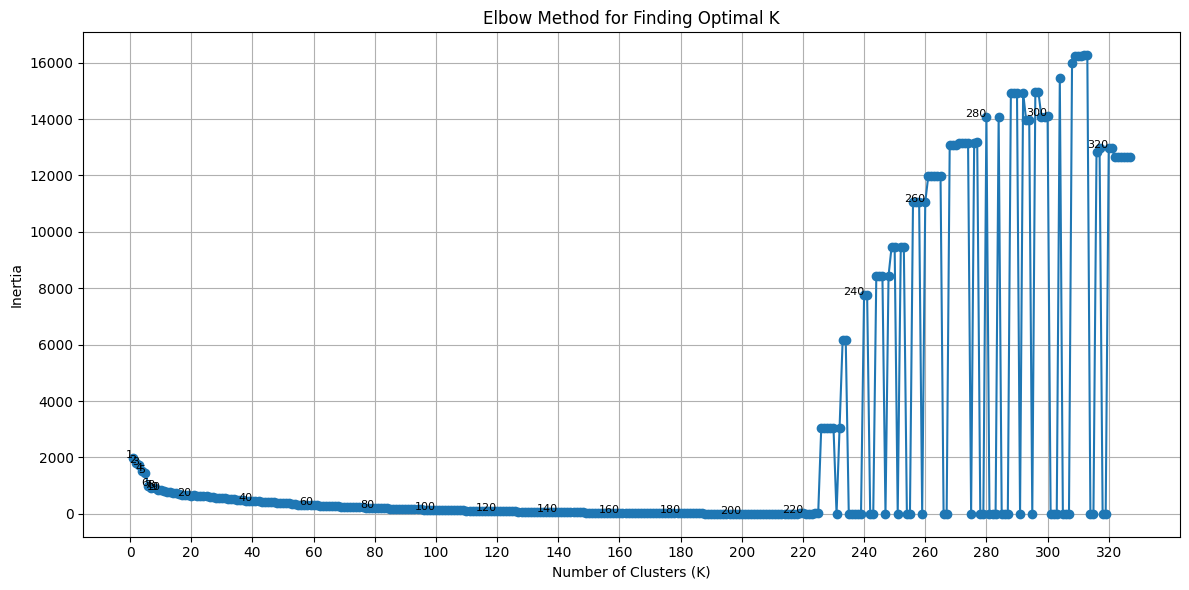

In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = df1_encoded
X = df.drop(columns=['trip_name', 'OD'])

inertias = []
K_range = range(1, 328)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# วาดกราฟข้อศอก
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, marker='o')
for i, value in enumerate(inertias):
    if K_range[i] % 20 == 0 or K_range[i] <= 10:  # ใส่ label เฉพาะบางจุด เพื่อไม่ให้รก
        plt.text(K_range[i], value, str(K_range[i]), fontsize=8, ha='right')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Finding Optimal K')
plt.grid(True)
plt.xticks(range(0, 330, 20))
plt.tight_layout()
plt.show()


In [92]:
pd.set_option('display.max_colwidth', None)  # แสดงข้อความในคอลัมน์แบบไม่ตัด

from sklearn.cluster import KMeans
df = df1_encoded
# เลือกเฉพาะ columns ของ roadNumber (ไม่เอา trip_id และ route_cluster)
X = df.drop(columns=['trip_name','OD'])

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

from sklearn.cluster import KMeans

df2 = pd.DataFrame({
    'trip_name': df['trip_name'],
    'cluster': df['cluster'],
})

pd.set_option('display.max_rows', None)
df2.sort_values('cluster')
df_verify = diff_dist_df.drop(columns=['ggmap_distance_km','OD','GPSP2P_dist','ggmap_distance_km','distance_diff_km'])
df_merged = pd.merge(df_verify, df2, on='trip_name', how='inner')
df_merged.head()



,trip_name,classified_route,distance_diff_pct,cluster
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5
1,001001200000010345100000001-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,34.099452,5
2,001001200000020870200000001-2,Gateway City Industrial Estate - Laem Chabang Port - via 331,10.373393,5
3,001001300c01000083100000054-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,3.122983,5
4,001001300c01000083100000127-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,-7.191117,5


In [93]:
df_merged2 = pd.merge(gdf_utm, df_merged, on='trip_name', how='left')
df_merged2.head()

,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry,classified_route,distance_diff_pct,cluster
0,001000500000000196800100732,2024-11-01 06:21:49.000,13.613468,101.329190,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (752007.902 1506184.59),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
1,001000500000000196800100732,2024-11-01 06:22:28.000,13.617197,101.324670,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (751514.674 1506592.611),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
2,001000500000000196800100732,2024-11-01 06:24:29.000,13.619810,101.317000,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (750681.667 1506873.876),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
3,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
4,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0


In [94]:
df_merged2 = pd.merge(gdf_utm, df_merged, on='trip_name', how='left')
df_merged2.head()

,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry,classified_route,distance_diff_pct,cluster
0,001000500000000196800100732,2024-11-01 06:21:49.000,13.613468,101.329190,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (752007.902 1506184.59),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
1,001000500000000196800100732,2024-11-01 06:22:28.000,13.617197,101.324670,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (751514.674 1506592.611),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
2,001000500000000196800100732,2024-11-01 06:24:29.000,13.619810,101.317000,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (750681.667 1506873.876),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
3,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0
4,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang Port,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009),Gateway City Industrial Estate - Laem Chabang Port - via 331,-2.600519,5.0


In [96]:
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

# Complete list with corrected 'Hi-Tech Industrial Estate' entry
estates = [
    {'name': 'Laem Chabang Port', 'lat': 13.0909, 'lon': 100.8845},
    {'name': 'Bang Pa-in Industrial Estate', 'lat': 14.2000, 'lon': 100.5864},
    {'name': 'Hi-Tech Industrial Estate', 'lat': 14.2471, 'lon': 100.5861},  # Add lat lon for Hi-Tech Estate
    {'name': 'Samut Sakhon Industrial Estate', 'lat': 13.5475, 'lon': 100.2736},
    {'name': 'Sinsakhon Industrial Estate', 'lat': 13.5500, 'lon': 100.3000},
    {'name': 'Wellgrow Industrial Estate', 'lat': 13.5842, 'lon': 100.9403},
    {'name': 'Gateway City Industrial Estate', 'lat': 13.6670, 'lon': 101.33300},
    {'name': 'TFD Industrial Estate', 'lat': 13.5642, 'lon': 100.9922},
    {'name': 'TFD Industrial Estate 2', 'lat': 13.5700, 'lon': 101.0000},
]

# สร้าง GeoDataFrame
gdf_industrial1 = gpd.GeoDataFrame(estates,
                                   geometry=[Point(e['lon'], e['lat']) for e in estates],
                                   crs='EPSG:4326'  # WGS84
)

# Output GeoDataFrame
gdf_industrial1



# แปลง CRS เป็น UTM zone 47N (เหมาะสำหรับประเทศไทย)
gdf_industrial2  = gdf_industrial1.to_crs(epsg=32647)
gdf_industrial2

# สร้างวงกลมรัศมี 1,000 เมตร (1 กิโลเมตร)
#gdf_industrial['buffer'] = gdf_industrial.geometry.buffer(4000)

# แปลงกลับเป็น WGS84
#gdf_buffers = gdf_industrial.set_geometry('buffer')
#gdf_buffers
#gdf_buffers.to_csv("output3.csv", index=False)
#gdf_buffers.info()
#gdf_buffers

# ✅ สร้าง geometry (POINT จาก lon/lat)
gdf_industrial2['geometry'] = gdf_industrial2.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf2 = gpd.GeoDataFrame(gdf_industrial2, geometry='geometry', crs='EPSG:4326')  # พิกัด WGS84

# ✅ แปลงพิกัดเป็น EPSG:3857 สำหรับ plot ลงแผนที่
gdf2 = gdf2.to_crs(epsg=3857)


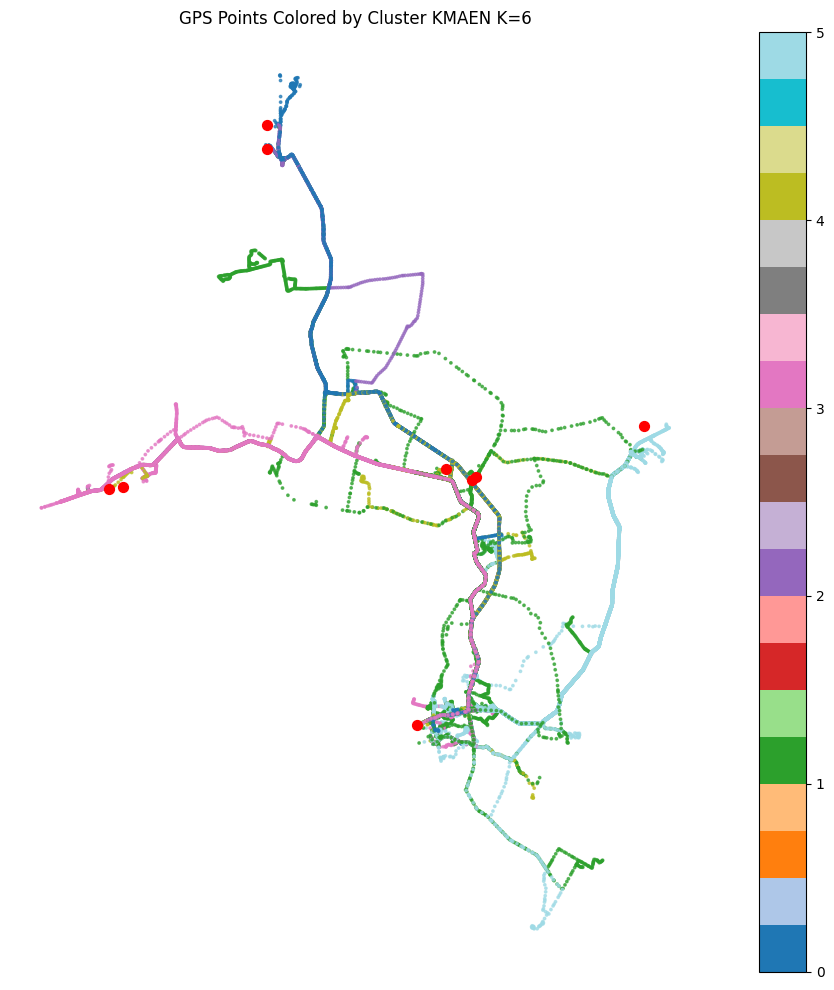

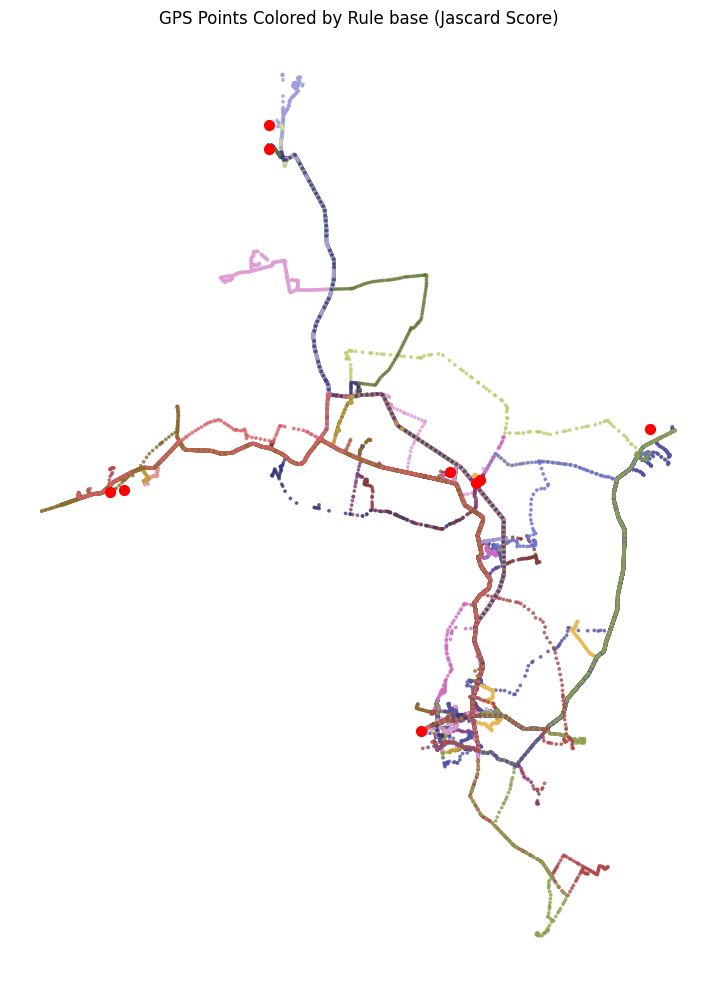

In [109]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
#import contextily as ctx
from shapely.geometry import Point

# สมมติ df ของคุณชื่อ df_all
df = df_merged2.copy()

# ✅ สร้าง geometry (POINT จาก lon/lat)
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')  # พิกัด WGS84

# ✅ แปลงพิกัดเป็น EPSG:3857 สำหรับ plot ลงแผนที่
gdf = gdf.to_crs(epsg=3857)

# ✅ Plot 1: แยกสีตาม cluster
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='cluster', legend=True, cmap='tab20', markersize=3, alpha=0.7)
gdf2.plot(ax=ax, marker='o', color='red', markersize=50, label='Industrial Estates')

#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('GPS Points Colored by Cluster KMAEN K=6')
plt.axis('off')
plt.tight_layout()
plt.show()

# ✅ Plot 2: แยกสีตาม classified_route
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='classified_route', legend=0, cmap='tab20b', markersize=3, alpha=0.7)
gdf2.plot(ax=ax, marker='o', color='red', markersize=50, label='Industrial Estates')

#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('GPS Points Colored by Rule base (Jascard Score)')
plt.axis('off')
plt.tight_layout()
plt.show()


# 3 Carbon emission

## 3.1 routes distance

In [51]:
from geopy.distance import geodesic

def calculate_total_trip_distances(df):
    """
    คำนวณระยะทางรวมจากทุกจุดในแต่ละ trip_id

    Args:
        df (pd.DataFrame): ต้องมี 'trip_id', 'lat', 'lon', 'uts_ts'

    Returns:
        pd.DataFrame: แต่ละ trip_id กับระยะทางรวม (กิโลเมตร)
    """
    results = []

    for trip_name, group in df.groupby("trip_name"):
        group_sorted = group.sort_values("timestamp")
        coords = list(zip(group_sorted["lat"], group_sorted["lon"]))

        total_distance_km = 0.0
        for i in range(1, len(coords)):
            total_distance_km += geodesic(coords[i-1], coords[i]).kilometers

        results.append({
            "trip_name": trip_name,
            "GPSP2P_dist": total_distance_km,
            "num_points": len(coords)
        })

    return pd.DataFrame(results)
GPS_P2Pdistance = calculate_total_trip_distances(gdf_utm)
GPS_P2Pdistance.head()

,trip_name,GPSP2P_dist,num_points
0,001000500000000196800100732-1,97.399481,132
1,001000600000010090400000694-1,76.779305,92
2,001000800000010140300000015-1,89.915563,121
3,001000800000010140300000015-2,105.944829,108
4,001000800000010853300000004-1,86.179868,85


In [53]:
routes_df


,OD,Route,ID_List,Dist
0,Wellgrow Industrial Estate - Laem Chabang Port,via 7,"[154, 150, 149]",76.7
1,Wellgrow Industrial Estate - Laem Chabang Port,via 34,"[153, 3701, 2404, 807, 299, 298]",63.5
2,Wellgrow Industrial Estate - Laem Chabang Port,via 3,"[2447, 697, 298, 299, 68, 69, 70, 71]",63.5
3,Gateway City Industrial Estate - Laem Chabang Port,via 331,"[741, 154, 738, 737, 739, 740]",100.0
4,Gateway City Industrial Estate - Laem Chabang Port,via 7,"[741, 2156, 699, 701, 700, 149, 150, 154]",94.3
5,TFD Industrial Estate - Laem Chabang Port,via 7,"[154, 150, 149]",68.1
6,TFD Industrial Estate - Laem Chabang Port,via 34,"[153, 3701, 2404, 807, 299, 298]",68.7
7,TFD Industrial Estate - Laem Chabang Port,via 3,"[2447, 697, 298, 299, 68, 69, 70, 71]",63.7
8,Bang Pa-in Industrial Estate - Laem Chabang Port,"via 7,9","[678, 275, 5, 163, 164, 146, 148, 149, 150, 154]",168.0
9,Bang Pa-in Industrial Estate - Laem Chabang Port,"via 9,34,3","[678, 275, 5, 163, 164, 296, 297, 298, 299, 68, 69, 70, 71]",162.0


In [55]:
routes_df["classified_route"] = routes_df["OD"] + " - " + routes_df["Route"]
routes_df
routes_df = routes_df.drop(columns='Route')
routes_df

,OD,ID_List,Dist,classified_route
0,Wellgrow Industrial Estate - Laem Chabang Port,"[154, 150, 149]",76.7,Wellgrow Industrial Estate - Laem Chabang Port - via 7
1,Wellgrow Industrial Estate - Laem Chabang Port,"[153, 3701, 2404, 807, 299, 298]",63.5,Wellgrow Industrial Estate - Laem Chabang Port - via 34
2,Wellgrow Industrial Estate - Laem Chabang Port,"[2447, 697, 298, 299, 68, 69, 70, 71]",63.5,Wellgrow Industrial Estate - Laem Chabang Port - via 3
3,Gateway City Industrial Estate - Laem Chabang Port,"[741, 154, 738, 737, 739, 740]",100.0,Gateway City Industrial Estate - Laem Chabang Port - via 331
4,Gateway City Industrial Estate - Laem Chabang Port,"[741, 2156, 699, 701, 700, 149, 150, 154]",94.3,Gateway City Industrial Estate - Laem Chabang Port - via 7
5,TFD Industrial Estate - Laem Chabang Port,"[154, 150, 149]",68.1,TFD Industrial Estate - Laem Chabang Port - via 7
6,TFD Industrial Estate - Laem Chabang Port,"[153, 3701, 2404, 807, 299, 298]",68.7,TFD Industrial Estate - Laem Chabang Port - via 34
7,TFD Industrial Estate - Laem Chabang Port,"[2447, 697, 298, 299, 68, 69, 70, 71]",63.7,TFD Industrial Estate - Laem Chabang Port - via 3
8,Bang Pa-in Industrial Estate - Laem Chabang Port,"[678, 275, 5, 163, 164, 146, 148, 149, 150, 154]",168.0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 7,9"
9,Bang Pa-in Industrial Estate - Laem Chabang Port,"[678, 275, 5, 163, 164, 296, 297, 298, 299, 68, 69, 70, 71]",162.0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 9,34,3"


In [57]:
# สมมติว่า all_classified_routes และ GPS_P2Pdistance ถูกโหลดไว้แล้ว
GPS_P2Pdistance1 = pd.merge(
    all_classified_routes,
    GPS_P2Pdistance,
    on="trip_name",            # ใช้ trip_id เป็น key
    how="left"               # ใช้ left join เพื่อเก็บทุก trip จาก all_classified_routes
)

# เปลี่ยนชื่อคอลัมน์ใน routes_df ให้ตรงกับ all_classified_routes
routes_df = routes_df.rename(columns={'Route': 'classified_route', 'Dist': 'ggmap_distance_km'})

# รวมข้อมูลตาม OD และ classified_route
googlemap_route_dist = pd.merge(
    all_classified_routes,
    routes_df[['OD', 'classified_route', 'ggmap_distance_km']],
    on=['OD', 'classified_route'],
    how='left'
)

googlemap_route_dist.head()

 


,trip_name,classified_route,OD,ggmap_distance_km
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port,100.0
1,001001200000010345100000001-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port,100.0
2,001001200000020870200000001-2,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port,100.0
3,001001300c01000083100000054-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port,100.0
4,001001300c01000083100000127-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,Gateway City Industrial Estate - Laem Chabang Port,100.0


### Verification หาผลต่างระหว่างระยะทางตามGoogle กับ GPS P2P Analysis


In [70]:
# 1. Merge ตารางเข้าด้วยกัน
merged_df = pd.merge(
    GPS_P2Pdistance1,
    googlemap_route_dist,
    on=['trip_name', 'classified_route' ,'OD'],
    how='inner'  # เอาเฉพาะ trip_id ที่มีอยู่ทั้งสองฝั่ง
)

# 2. คำนวณส่วนต่างระยะทาง
merged_df['distance_diff_km'] = merged_df['GPSP2P_dist'] - merged_df['ggmap_distance_km']
#merged_df['classified_route'] = merged_df['OD'] + " - " + merged_df['classified_route']

# 3. ดูผลลัพธ์ตัวอย่าง
diff_dist_df=(merged_df[['trip_name', 'OD','classified_route', 'GPSP2P_dist', 'ggmap_distance_km', 'distance_diff_km']])
diff_dist_df

diff_dist_df.head()
#diff_dist_df.to_excel('diff_dist_df.xlsx', index=False)


,trip_name,OD,classified_route,GPSP2P_dist,ggmap_distance_km,distance_diff_km
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port,Gateway City Industrial Estate - Laem Chabang Port - via 331,97.399481,100.0,-2.600519
1,001001200000010345100000001-1,Gateway City Industrial Estate - Laem Chabang Port,Gateway City Industrial Estate - Laem Chabang Port - via 331,134.099452,100.0,34.099452
2,001001200000020870200000001-2,Gateway City Industrial Estate - Laem Chabang Port,Gateway City Industrial Estate - Laem Chabang Port - via 331,110.373393,100.0,10.373393
3,001001300c01000083100000054-1,Gateway City Industrial Estate - Laem Chabang Port,Gateway City Industrial Estate - Laem Chabang Port - via 331,103.122983,100.0,3.122983
4,001001300c01000083100000127-1,Gateway City Industrial Estate - Laem Chabang Port,Gateway City Industrial Estate - Laem Chabang Port - via 331,92.808883,100.0,-7.191117


### GPSP2P_dist

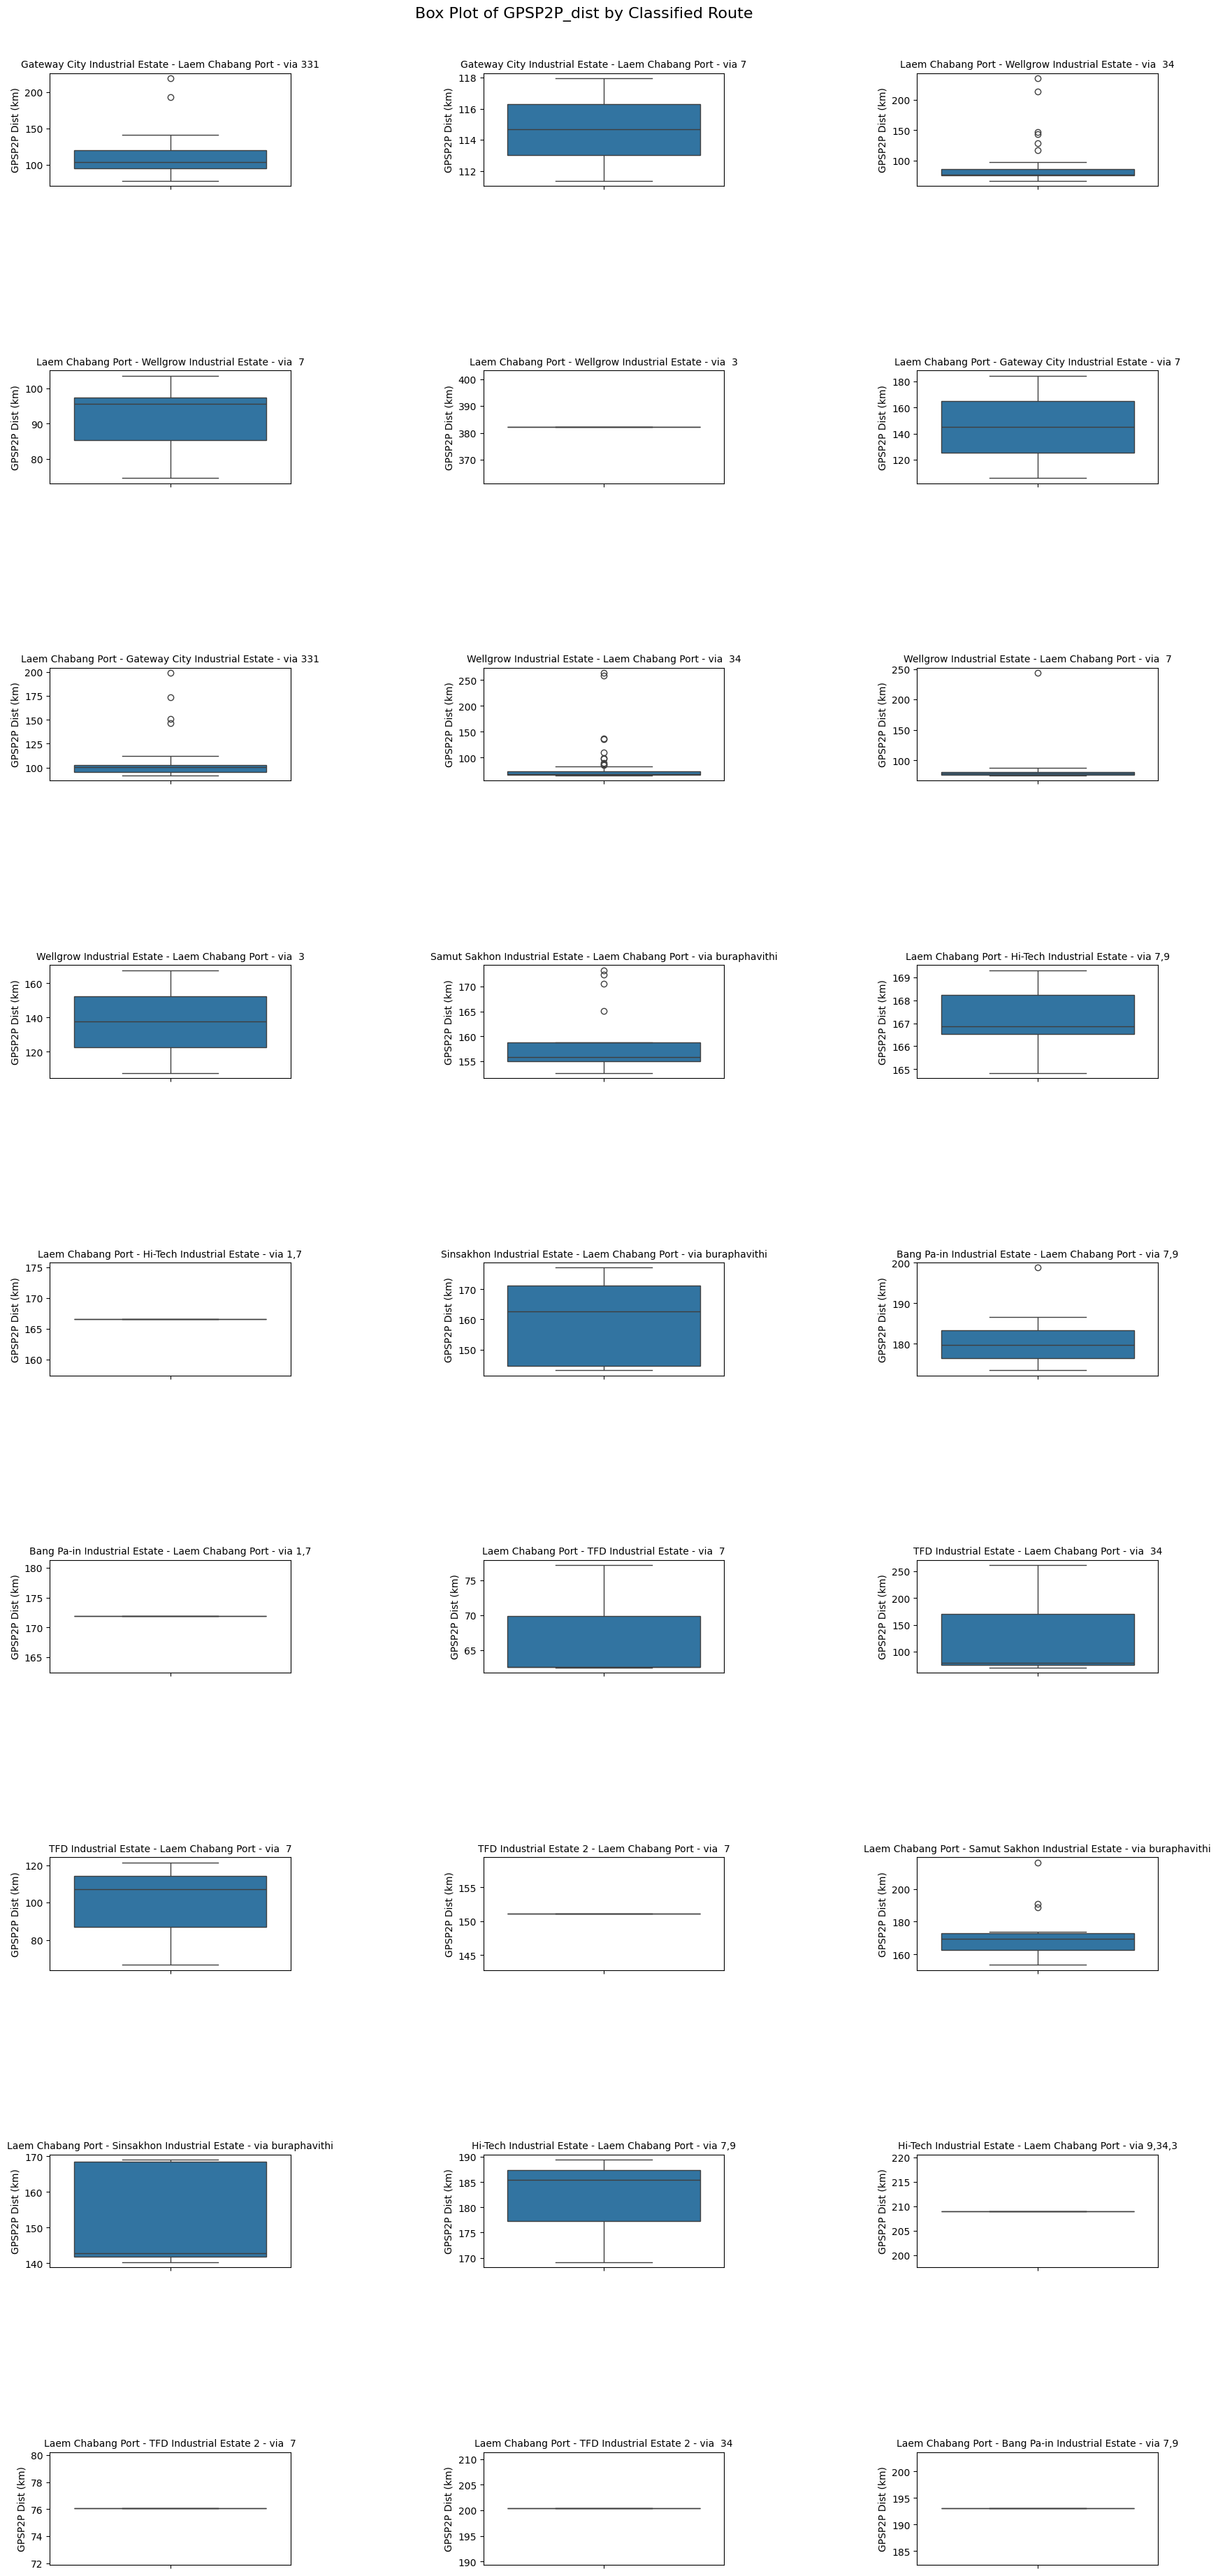

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

routes = diff_dist_df['classified_route'].unique()
n_routes = len(routes)

n_cols = 3
n_rows = (n_routes + n_cols - 1) // n_cols

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 5.5, n_rows * 4),
    constrained_layout=True,
    gridspec_kw={'wspace': 0.4, 'hspace': 0.6}  # ปรับระยะห่างระหว่างคอลัมน์และแถว
)

axes = axes.flatten()

for i, route in enumerate(routes):
    sns.boxplot(
        data=diff_dist_df[diff_dist_df['classified_route'] == route],
        y='GPSP2P_dist', ax=axes[i]
    )
    axes[i].set_title(route, fontsize=10)
    axes[i].set_ylabel('GPSP2P Dist (km)')

# ลบ subplot ที่เกินมา
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Box Plot of GPSP2P_dist by Classified Route", fontsize=16, y=1.02)
plt.show()


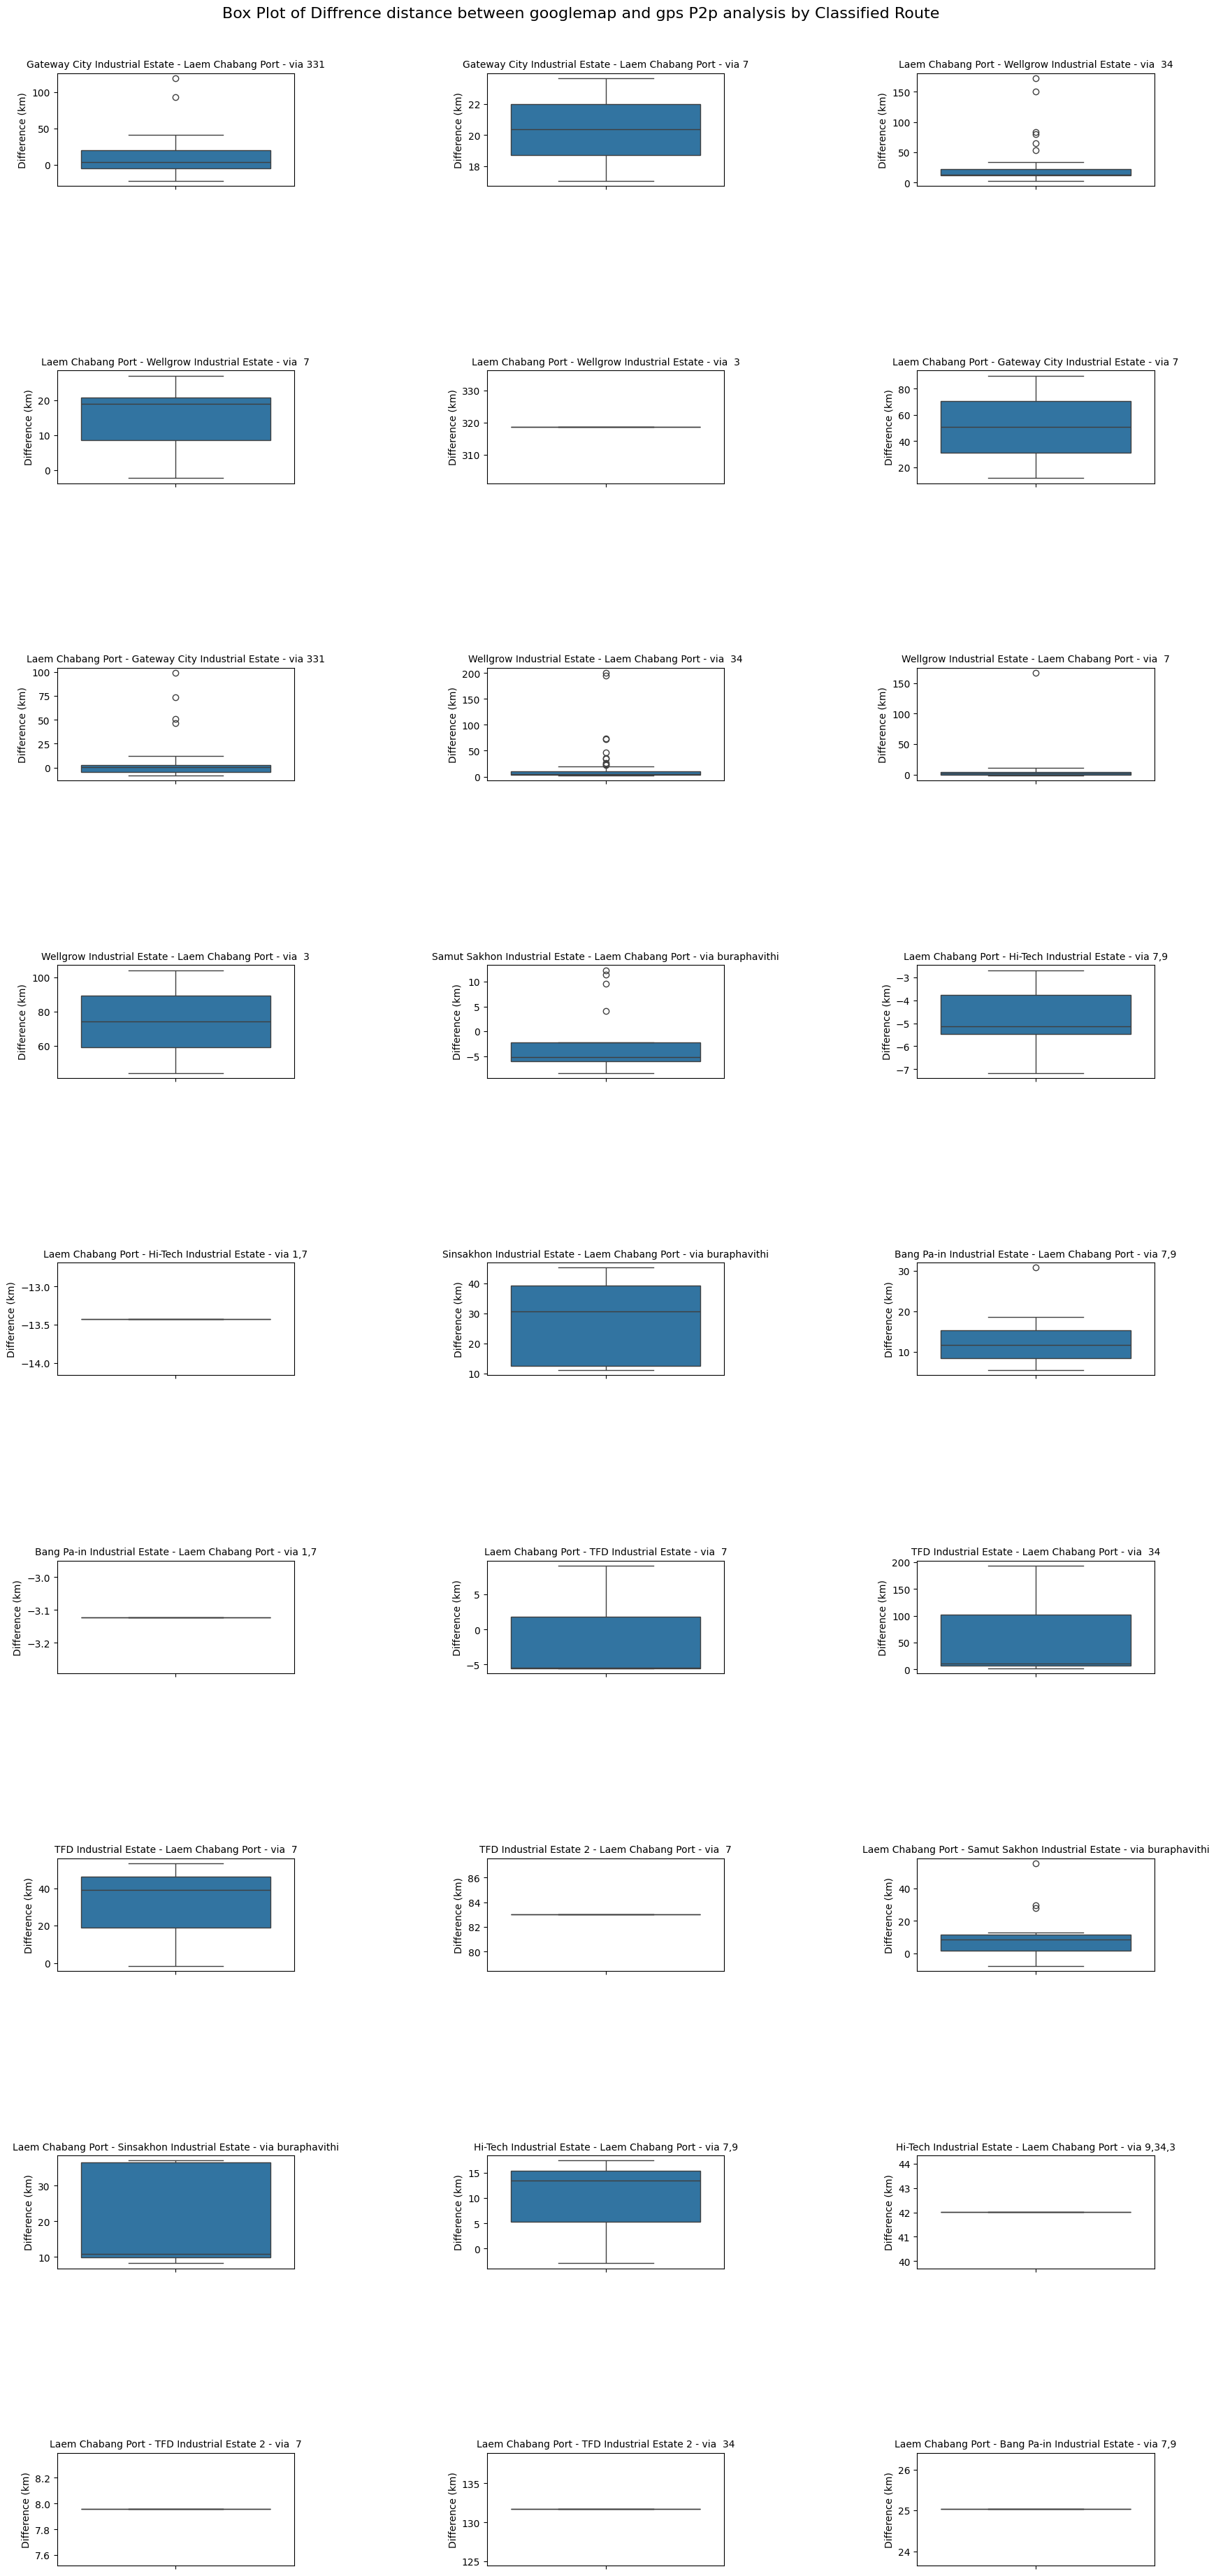

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

routes = diff_dist_df['classified_route'].unique()
n_routes = len(routes)

n_cols = 3
n_rows = (n_routes + n_cols - 1) // n_cols

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 5.5, n_rows * 4),
    constrained_layout=True,
    gridspec_kw={'wspace': 0.4, 'hspace': 0.6}  # ปรับระยะห่างระหว่างคอลัมน์และแถว
)

axes = axes.flatten()

for i, route in enumerate(routes):
    sns.boxplot(
        data=diff_dist_df[diff_dist_df['classified_route'] == route],
        y='distance_diff_km', ax=axes[i]
    )
    axes[i].set_title(route, fontsize=10)
    axes[i].set_ylabel('Difference (km)')

# ลบ subplot ที่เกินมา
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Box Plot of Diffrence distance between googlemap and gps P2p analysis by Classified Route", fontsize=16, y=1.02)
plt.show()


In [71]:
import pandas as pd

# โหลดข้อมูลของคุณ
# df = pd.read_csv('your_file.csv')  # ถ้ามาจากไฟล์


# คำนวณเปอร์เซ็นต์ของผลต่าง (distance_diff_km / ggmap_distance_km) * 100
diff_dist_df['distance_diff_pct'] = (diff_dist_df['distance_diff_km'] / diff_dist_df['ggmap_distance_km']) * 100

# หาค่าเฉลี่ย % diff ต่อ classified_route
grouped = diff_dist_df.groupby('classified_route')['distance_diff_pct'].mean().reset_index()

# เปลี่ยนชื่อคอลัมน์เพื่อความชัดเจน
grouped = grouped.rename(columns={'distance_diff_pct': 'avg_distance_diff_pct'})
grouped.to_excel('classified_route_diff_percent.xlsx', index=False)

# แสดงผล
grouped

,classified_route,avg_distance_diff_pct
0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 1,7",-1.784002
1,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 7,9",8.125402
2,Gateway City Industrial Estate - Laem Chabang Port - via 331,10.778296
3,Gateway City Industrial Estate - Laem Chabang Port - via 7,21.593876
4,"Hi-Tech Industrial Estate - Laem Chabang Port - via 7,9",5.427678
5,"Hi-Tech Industrial Estate - Laem Chabang Port - via 9,34,3",25.161217
6,"Laem Chabang Port - Bang Pa-in Industrial Estate - via 7,9",14.898521
7,Laem Chabang Port - Gateway City Industrial Estate - via 331,6.814879
8,Laem Chabang Port - Gateway City Industrial Estate - via 7,53.934818
9,"Laem Chabang Port - Hi-Tech Industrial Estate - via 1,7",-7.458065


In [73]:
grouped2 = diff_dist_df.groupby(['OD'])['distance_diff_pct'].mean().reset_index()
grouped2 = grouped.rename(columns={'distance_diff_pct': 'avg_distance_diff_pct'})

grouped2

,classified_route,avg_distance_diff_pct
0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 1,7",-1.784002
1,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 7,9",8.125402
2,Gateway City Industrial Estate - Laem Chabang Port - via 331,10.778296
3,Gateway City Industrial Estate - Laem Chabang Port - via 7,21.593876
4,"Hi-Tech Industrial Estate - Laem Chabang Port - via 7,9",5.427678
5,"Hi-Tech Industrial Estate - Laem Chabang Port - via 9,34,3",25.161217
6,"Laem Chabang Port - Bang Pa-in Industrial Estate - via 7,9",14.898521
7,Laem Chabang Port - Gateway City Industrial Estate - via 331,6.814879
8,Laem Chabang Port - Gateway City Industrial Estate - via 7,53.934818
9,"Laem Chabang Port - Hi-Tech Industrial Estate - via 1,7",-7.458065


In [60]:
total_diff = diff_dist_df['distance_diff_km'].sum()
total_ggmap = diff_dist_df['ggmap_distance_km'].sum()

percentage_diff = (total_diff / total_ggmap) * 100
print(f"Percentage Difference By GPS P2P Method: {percentage_diff:.2f}%")

Percentage Difference By GPS P2P Method: 17.70%


## 3.2 หาจำนวนทริปในแต่ละเส้นทาง

### จำนวนรถที่วิ่งในแต่ละOD

In [ ]:
# ดึงค่า string ออกจาก list
grouped_data['OD'] = grouped_data['OD'].apply(lambda x: x[0] if isinstance(x, list) else x)
pd.Series(grouped_data['OD'].unique())
OD_count = grouped_data['OD'].value_counts()
OD_count.info()
OD_count.to_dataframe

<class 'pandas.core.series.Series'>
Index: 16 entries, Wellgrow Industrial Estate - Laem Chabang Port to Laem Chabang Port - Bang Pa-in Industrial Estate
Series name: count
Non-Null Count  Dtype
--------------  -----
16 non-null     int64
dtypes: int64(1)
memory usage: 256.0+ bytes


In [87]:
# Extract the first element from each list in the 'OD' column
grouped_data['OD'] = grouped_data['OD'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Get unique values from the 'OD' column
pd.Series(grouped_data['OD'].unique())

# Count the occurrences of each unique value in the 'OD' column
OD_count = grouped_data['OD'].value_counts()

# Convert the Series to a DataFrame
OD_count_df = OD_count.reset_index()
OD_count_df.columns = ['OD', 'Count']  # Rename columns for clarity

# Display the DataFrame structure
OD_count_df.info()
OD_count_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   OD      16 non-null     object
 1   Count   16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


,OD,Count
0,Wellgrow Industrial Estate - Laem Chabang Port,80
1,Laem Chabang Port - Wellgrow Industrial Estate,75
2,Gateway City Industrial Estate - Laem Chabang Port,57
3,Laem Chabang Port - Gateway City Industrial Estate,39
4,Samut Sakhon Industrial Estate - Laem Chabang Port,17
5,Laem Chabang Port - Samut Sakhon Industrial Estate,15
6,Laem Chabang Port - Hi-Tech Industrial Estate,9
7,Bang Pa-in Industrial Estate - Laem Chabang Port,8
8,TFD Industrial Estate - Laem Chabang Port,6
9,Sinsakhon Industrial Estate - Laem Chabang Port,5


### จำนวนรถที่วิ่งในแต่ละ Routes

In [62]:
trip_counts = diff_dist_df.groupby("classified_route")["trip_name"].count().reset_index()
trip_counts = trip_counts.rename(columns={"trip_name": "trip_count"})
trip_counts 

,classified_route,trip_count
0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 1,7",1
1,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 7,9",7
2,Gateway City Industrial Estate - Laem Chabang Port - via 331,55
3,Gateway City Industrial Estate - Laem Chabang Port - via 7,2
4,"Hi-Tech Industrial Estate - Laem Chabang Port - via 7,9",3
5,"Hi-Tech Industrial Estate - Laem Chabang Port - via 9,34,3",1
6,"Laem Chabang Port - Bang Pa-in Industrial Estate - via 7,9",1
7,Laem Chabang Port - Gateway City Industrial Estate - via 331,37
8,Laem Chabang Port - Gateway City Industrial Estate - via 7,2
9,"Laem Chabang Port - Hi-Tech Industrial Estate - via 1,7",1


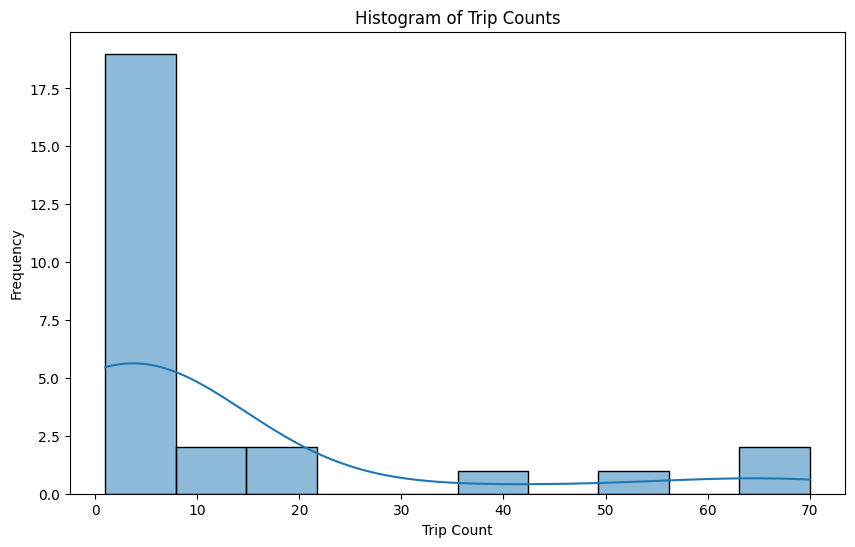

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=trip_counts, x='trip_count', bins=10, kde=True)
plt.title('Histogram of Trip Counts')
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.show()


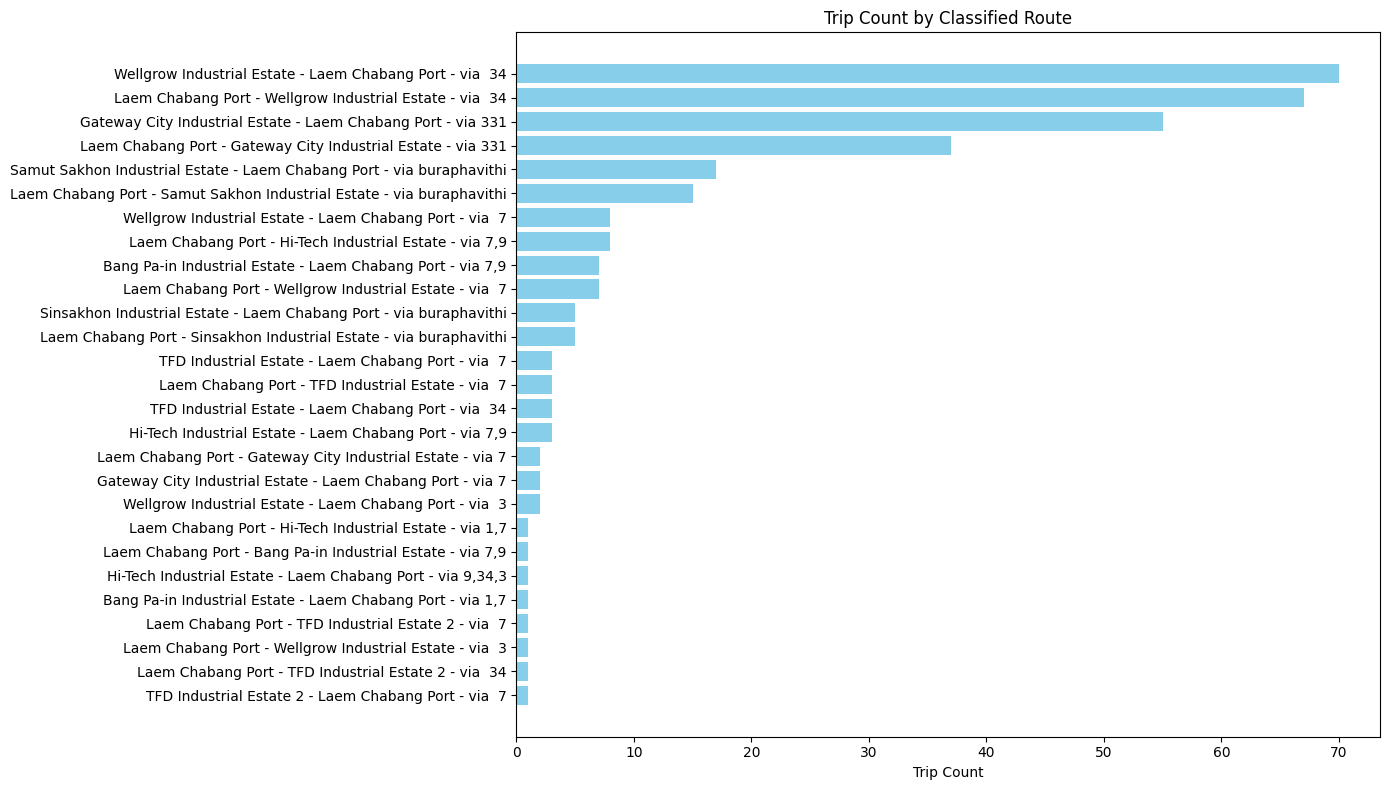

In [81]:
import matplotlib.pyplot as plt

# Sort the data by trip_count for better visualization
sorted_df = trip_counts.sort_values(by='trip_count', ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(sorted_df['classified_route'], sorted_df['trip_count'], color='skyblue')
plt.xlabel('Trip Count')
plt.title('Trip Count by Classified Route')
plt.gca().invert_yaxis()  # To show the highest trip count at the top
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Sort the data by trip_count for better visualization
sorted_df = trip_counts.sort_values(by='trip_count', ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(sorted_df['classified_route'], sorted_df['trip_count'], color='skyblue')
plt.xlabel('Trip Count')
plt.title('Trip Count by Classified Route')
plt.gca().invert_yaxis()  # To show the highest trip count at the top
plt.tight_layout()
plt.show()

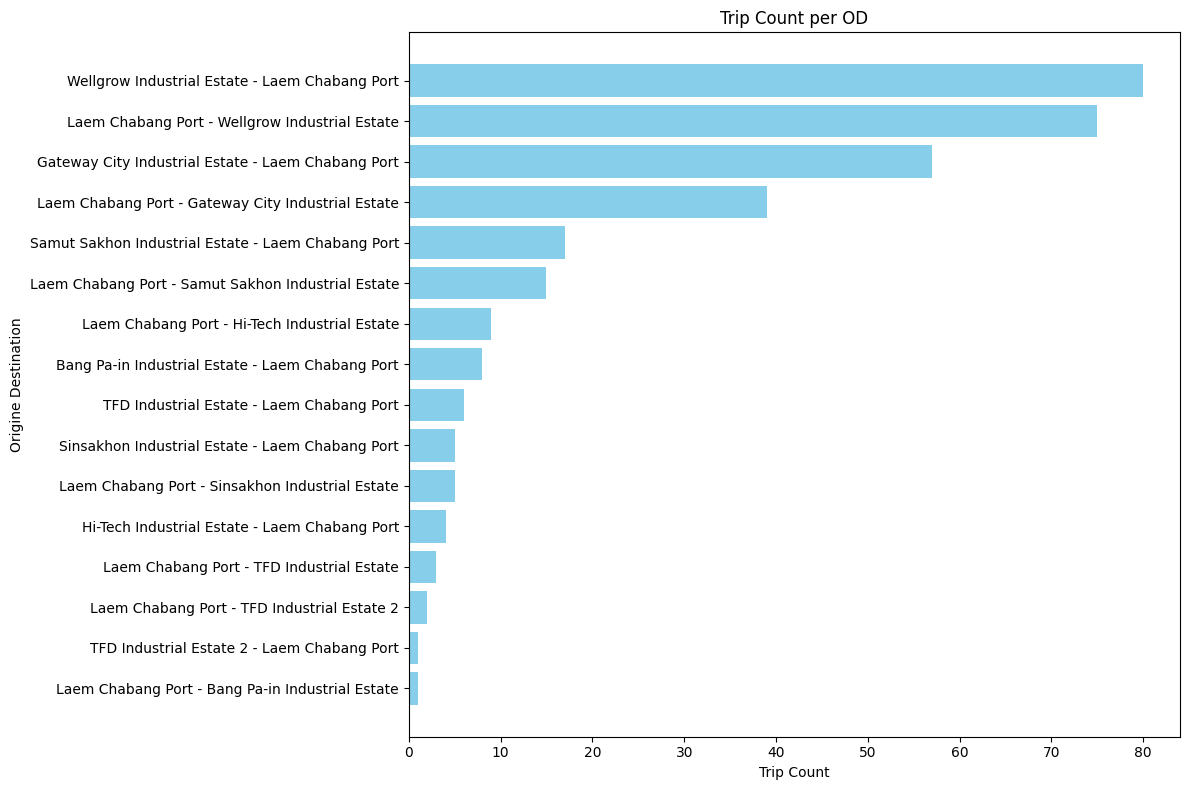

In [90]:
import matplotlib.pyplot as plt

# จัดเรียงข้อมูลจากมากไปน้อยเพื่อให้อ่านง่าย
sorted_trip_counts = OD_count_df.sort_values("Count", ascending=False)

# สร้าง bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_trip_counts["OD"], sorted_trip_counts["Count"], color='skyblue')
plt.xlabel("Trip Count")
plt.ylabel("Origine Destination")
plt.title("Trip Count per OD")
plt.gca().invert_yaxis()  # ให้ route ที่มี count สูงสุดอยู่ด้านบน
plt.tight_layout()
plt.show()


## 3.3 ระยะทางรวมทั้งหมดแต่ละเส้นทาง

In [66]:
total_distance_by_route = diff_dist_df.groupby("classified_route")[["GPSP2P_dist", "ggmap_distance_km"]].sum().reset_index()
total_distance_by_route

,classified_route,GPSP2P_dist,ggmap_distance_km
0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 1,7",171.877996,175.0
1,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 7,9",1271.554727,1176.0
2,Gateway City Industrial Estate - Laem Chabang Port - via 331,6092.806276,5500.0
3,Gateway City Industrial Estate - Laem Chabang Port - via 7,229.326049,188.6
4,"Hi-Tech Industrial Estate - Laem Chabang Port - via 7,9",544.006817,516.0
5,"Hi-Tech Industrial Estate - Laem Chabang Port - via 9,34,3",209.019233,167.0
6,"Laem Chabang Port - Bang Pa-in Industrial Estate - via 7,9",193.029515,168.0
7,Laem Chabang Port - Gateway City Industrial Estate - via 331,3952.150521,3700.0
8,Laem Chabang Port - Gateway City Industrial Estate - via 7,290.321066,188.6
9,"Laem Chabang Port - Hi-Tech Industrial Estate - via 1,7",166.575483,180.0


## 3.4 การปล่อยคาร์บอนรวมทั้งหมดแต่ละเส้นทาง

In [68]:
# สร้างสำเนา DataFrame เพื่อความปลอดภัย
df_summary = total_distance_by_route.copy()

# เปลี่ยนชื่อคอลัมน์ ggmap_distance_km เป็น Total_Distance ถ้าต้องการใช้คอลัมน์นี้
df_summary = df_summary.rename(columns={"GPSP2P_dist": "Total_Distance"})

# คำนวณ Carbon Emission (kgCO2)
df_summary["Carbon Emission (kgCO2)"] = (df_summary["Total_Distance"] * 25 * 0.7 * 0.0852).round(2)

# ดูผลลัพธ์
(df_summary[["classified_route", "Total_Distance", "Carbon Emission (kgCO2)"]])


,classified_route,Total_Distance,Carbon Emission (kgCO2)
0,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 1,7",171.877996,256.27
1,"Bang Pa-in Industrial Estate - Laem Chabang Port - via 7,9",1271.554727,1895.89
2,Gateway City Industrial Estate - Laem Chabang Port - via 331,6092.806276,9084.37
3,Gateway City Industrial Estate - Laem Chabang Port - via 7,229.326049,341.93
4,"Hi-Tech Industrial Estate - Laem Chabang Port - via 7,9",544.006817,811.11
5,"Hi-Tech Industrial Estate - Laem Chabang Port - via 9,34,3",209.019233,311.65
6,"Laem Chabang Port - Bang Pa-in Industrial Estate - via 7,9",193.029515,287.81
7,Laem Chabang Port - Gateway City Industrial Estate - via 331,3952.150521,5892.66
8,Laem Chabang Port - Gateway City Industrial Estate - via 7,290.321066,432.87
9,"Laem Chabang Port - Hi-Tech Industrial Estate - via 1,7",166.575483,248.36


In [70]:
total_carbon_emission = df_summary["Carbon Emission (kgCO2)"].sum()
print("Total Carbon Emission =", str(total_carbon_emission) + " kgCO2")

Total Carbon Emission = 53820.32 kgCO2


# กรอกไอดีเพื่อเช็คผลว่าวิ่งตรงกับRoute ที่Classified มารึเปล่า
##### trip_id_to_show เปลี่ยนแค่ค่าในตัวแปรนี้ แล้วไปเทียบclassified_routeกับเส้นทางที่แคปไว้ในDoc

In [57]:
import plotly.graph_objects as go

# Convert to WGS84
polyline_data_wgs84 = polyline_data.to_crs(epsg=4326)

# === MANUAL TRIP ID ===
trip_id_to_show = "036000500000864352042967497-1"  # Replace with your desired trip_id

# Filter GPS data for the trip
filtered_gdf = gdf_utm[gdf_utm["trip_name"] == trip_id_to_show]

# Get related road IDs from this filtered GPS data
ids_to_plot = filtered_gdf["trip_name"].astype(str).unique()

# Filter polyline data
filtered_poly = polyline_data_wgs84[polyline_data_wgs84['id'].astype(str).isin(ids_to_plot)]

# Create the map
fig = go.Figure()


# Add truck GPS points
fig.add_trace(go.Scattermapbox(
    mode='markers',
    lon=filtered_gdf['lon'],
    lat=filtered_gdf['lat'],
    marker=dict(size=8, color='red', symbol='circle'),
    name=f"Truck Trip {trip_id_to_show}",
    text=filtered_gdf['trip_name']
))

# Center map
if not filtered_gdf.empty:
    center_lat = filtered_gdf['lat'].iloc[0]
    center_lon = filtered_gdf['lon'].iloc[0]
elif not filtered_poly.empty:
    first_geom = filtered_poly.iloc[0]['geometry']
    first_coords = list(first_geom.coords)
    center_lon = sum(pt[0] for pt in first_coords) / len(first_coords)
    center_lat = sum(pt[1] for pt in first_coords) / len(first_coords)
else:
    center_lat, center_lon = 13.75, 100.5  # fallback center

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat": center_lat, "lon": center_lon},
    height=600,
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title=f"Trip: {trip_id_to_show}"
)

fig.show(config={"scrollZoom": True})


C:\Users\Admin\AppData\Local\Temp\ipykernel_6744\1828862057.py:23: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



# ----------------------------------------------------------------------------------------------------------------------

# (KMEANS)

In [77]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

df1 =total_dist_truck[['trip_name','id','OD']]

# Step 2: Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(df1['id']),
                       columns=[f"id_{x}" for x in mlb.classes_],
                       index=df1.index)


# Step 3: Combine the one-hot columns back to the original dataframe
df1_encoded = pd.concat([df1.drop(columns=['id']),one_hot], axis=1)

# Step 4 (optional): Save or preview
df1_encoded


,trip_name,OD,id_146,id_148,id_149,id_150,id_152,id_153,id_154,id_157,...,id_741,id_766,id_767,id_771,id_772,id_773,id_774,id_807,id_813,id_818
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang ...,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,001000600000010090400000694-1,Laem Chabang Port - Wellgrow Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,001000800000010140300000015-1,Wellgrow Industrial Estate - Laem Chabang Port,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,001000800000010140300000015-2,Laem Chabang Port - Gateway City Industrial Es...,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,001000800000010853300000004-1,Laem Chabang Port - Wellgrow Industrial Estate,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,196000100000000153220713403-1,Laem Chabang Port - Samut Sakhon Industrial Es...,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
323,196000100000000153220713403-2,Samut Sakhon Industrial Estate - Laem Chabang ...,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
324,196000100000000153221014352-1,Bang Pa-in Industrial Estate - Laem Chabang Port,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
325,196000300000860503075482655-1,Laem Chabang Port - Samut Sakhon Industrial Es...,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
unique_od = df1_encoded['OD'].unique()

print(len(unique_od))
unique_od

16


array(['Gateway City Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Wellgrow Industrial Estate',
       'Wellgrow Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Gateway City Industrial Estate',
       'Samut Sakhon Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Hi-Tech Industrial Estate',
       'Laem Chabang Port - Samut Sakhon Industrial Estate',
       'Sinsakhon Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - TFD Industrial Estate',
       'Bang Pa-in Industrial Estate - Laem Chabang Port',
       'TFD Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - Sinsakhon Industrial Estate',
       'Hi-Tech Industrial Estate - Laem Chabang Port',
       'Laem Chabang Port - TFD Industrial Estate 2',
       'TFD Industrial Estate 2 - Laem Chabang Port',
       'Laem Chabang Port - Bang Pa-in Industrial Estate'], dtype=object)

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning:

Number of distinct clusters (205) found smaller than n_clusters (206). Possibly due to duplicate points in X.

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning:

Number of distinct clusters (205) found smaller than n_clusters (207). Possibly due to duplicate points in X.

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning:

Number of distinct clusters (205) found smaller than n_clusters (208). Possibly due to duplicate points in X.

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning:

Number of distinct clusters (205) found smaller than n_clusters (209). Possibly due to duplicate points in X.

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1389: ConvergenceWarning:

Number of distinct clusters (20

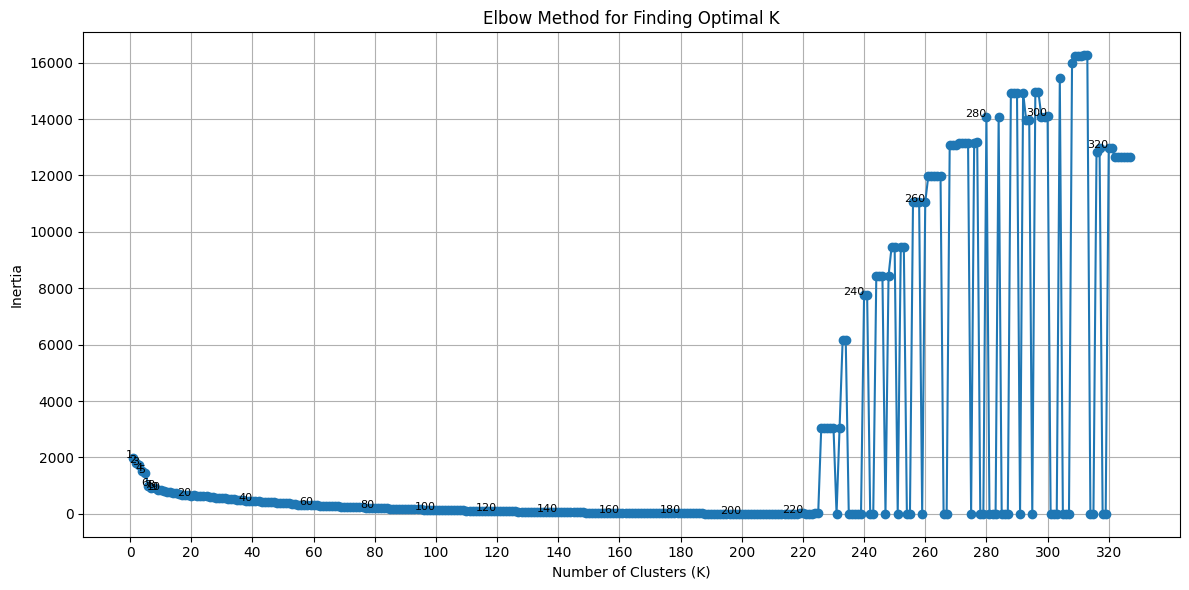

ModuleNotFoundError: No module named 'kneed'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = df1_encoded
X = df.drop(columns=['trip_name', 'OD'])

inertias = []
K_range = range(1, 328)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# วาดกราฟข้อศอก
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, marker='o')
for i, value in enumerate(inertias):
    if K_range[i] % 20 == 0 or K_range[i] <= 10:  # ใส่ label เฉพาะบางจุด เพื่อไม่ให้รก
        plt.text(K_range[i], value, str(K_range[i]), fontsize=8, ha='right')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Finding Optimal K')
plt.grid(True)
plt.xticks(range(0, 330, 20))
plt.tight_layout()
plt.show()


In [ ]:
pd.set_option('display.max_colwidth', None)  # แสดงข้อความในคอลัมน์แบบไม่ตัด

from sklearn.cluster import KMeans
df = df1_encoded
# เลือกเฉพาะ columns ของ roadNumber (ไม่เอา trip_id และ route_cluster)
X = df.drop(columns=['trip_name','OD'])

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

from sklearn.cluster import KMeans

df2 = pd.DataFrame({
    'trip_name': df['trip_name'],
    'cluster': df['cluster'],
})

pd.set_option('display.max_rows', None)
df2.sort_values('cluster')
df_verify = diff_dist_df.drop(columns=['ggmap_distance_km','OD','GPSP2P_dist','ggmap_distance_km','distance_diff_km'])
df_merged = pd.merge(df_verify, df2, on='trip_name', how='inner')
df_merged.head()



,trip_name,classified_route,cluster
0,001000500000000196800100732-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,4
1,001001200000010345100000001-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,4
2,001001200000020870200000001-2,Gateway City Industrial Estate - Laem Chabang Port - via 331,4
3,001001300c01000083100000054-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,4
4,001001300c01000083100000127-1,Gateway City Industrial Estate - Laem Chabang Port - via 331,4


In [99]:
pd.reset_option("all")


C:\Users\Admin\AppData\Local\Temp\ipykernel_6744\494669563.py:1: FutureWarning:

data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6744\494669563.py:1: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



In [100]:
df_merged2 = pd.merge(gdf_utm, df_merged, on='trip_name', how='left')
df_merged2.head()

,trip_id,timestamp,lat,lon,OD,trip_Count,trip_name,start,end),geometry,classified_route,cluster
0,001000500000000196800100732,2024-11-01 06:21:49.000,13.613468,101.329190,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (752007.902 1506184.59),Gateway City Industrial Estate - Laem Chabang ...,4.0
1,001000500000000196800100732,2024-11-01 06:22:28.000,13.617197,101.324670,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (751514.674 1506592.611),Gateway City Industrial Estate - Laem Chabang ...,4.0
2,001000500000000196800100732,2024-11-01 06:24:29.000,13.619810,101.317000,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (750681.667 1506873.876),Gateway City Industrial Estate - Laem Chabang ...,4.0
3,001000500000000196800100732,2024-11-01 06:26:29.000,13.616853,101.310486,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749979.668 1506539.91),Gateway City Industrial Estate - Laem Chabang ...,4.0
4,001000500000000196800100732,2024-11-01 06:27:29.000,13.611524,101.307440,Gateway City Industrial Estate - Laem Chabang ...,1,001000500000000196800100732-1,2024-11-01 06:21:49.000,2024-11-01 10:50:57.000,POINT (749655.545 1505947.009),Gateway City Industrial Estate - Laem Chabang ...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44492,196000300000860503075482655,2024-11-01 19:42:39.000,13.113491,100.962670,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (712775.065 1450513.381),Samut Sakhon Industrial Estate - Laem Chabang ...,1.0
44493,196000300000860503075482655,2024-11-01 19:43:40.000,13.111698,100.953498,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (711781.905 1450307.278),Samut Sakhon Industrial Estate - Laem Chabang ...,1.0
44494,196000300000860503075482655,2024-11-01 19:46:41.000,13.109635,100.929518,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (709183.045 1450059.021),Samut Sakhon Industrial Estate - Laem Chabang ...,1.0
44495,196000300000860503075482655,2024-11-01 19:47:42.000,13.105650,100.920946,Samut Sakhon Industrial Estate - Laem Chabang ...,2,196000300000860503075482655-2,2024-11-01 06:55:33.000,2024-11-01 19:50:43.000,POINT (708256.775 1449611.02),Samut Sakhon Industrial Estate - Laem Chabang ...,1.0


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS

# Complete list with corrected 'Hi-Tech Industrial Estate' entry
estates = [
    {'name': 'Laem Chabang Port', 'lat': 13.0909, 'lon': 100.8845},
    {'name': 'Bang Pa-in Industrial Estate', 'lat': 14.2000, 'lon': 100.5864},
    {'name': 'Hi-Tech Industrial Estate', 'lat': 14.2471, 'lon': 100.5861},  # Add lat lon for Hi-Tech Estate
    {'name': 'Samut Sakhon Industrial Estate', 'lat': 13.5475, 'lon': 100.2736},
    {'name': 'Sinsakhon Industrial Estate', 'lat': 13.5500, 'lon': 100.3000},
    {'name': 'Wellgrow Industrial Estate', 'lat': 13.5842, 'lon': 100.9403},
    {'name': 'Gateway City Industrial Estate', 'lat': 13.6670, 'lon': 101.33300},
    {'name': 'TFD Industrial Estate', 'lat': 13.5642, 'lon': 100.9922},
    {'name': 'TFD Industrial Estate 2', 'lat': 13.5700, 'lon': 101.0000},
]

# สร้าง GeoDataFrame
gdf_industrial1 = gpd.GeoDataFrame(estates,
                                   geometry=[Point(e['lon'], e['lat']) for e in estates],
                                   crs='EPSG:4326'  # WGS84
)

# Output GeoDataFrame
gdf_industrial1



# แปลง CRS เป็น UTM zone 47N (เหมาะสำหรับประเทศไทย)
gdf_industrial2  = gdf_industrial1.to_crs(epsg=32647)
gdf_industrial2

# สร้างวงกลมรัศมี 1,000 เมตร (1 กิโลเมตร)
#gdf_industrial['buffer'] = gdf_industrial.geometry.buffer(4000)

# แปลงกลับเป็น WGS84
#gdf_buffers = gdf_industrial.set_geometry('buffer')
#gdf_buffers
#gdf_buffers.to_csv("output3.csv", index=False)
#gdf_buffers.info()
#gdf_buffers

# ✅ สร้าง geometry (POINT จาก lon/lat)
gdf_industrial2['geometry'] = gdf_industrial2.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf2 = gpd.GeoDataFrame(gdf_industrial2, geometry='geometry', crs='EPSG:4326')  # พิกัด WGS84

# ✅ แปลงพิกัดเป็น EPSG:3857 สำหรับ plot ลงแผนที่
gdf2 = gdf2.to_crs(epsg=3857)


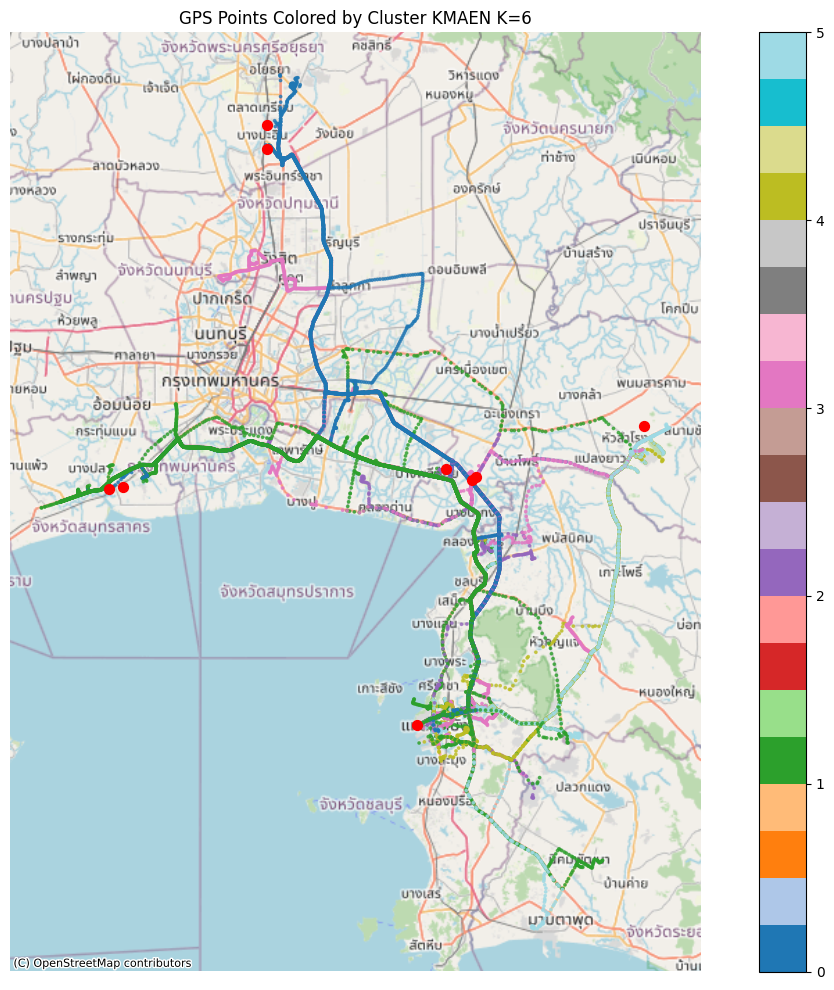

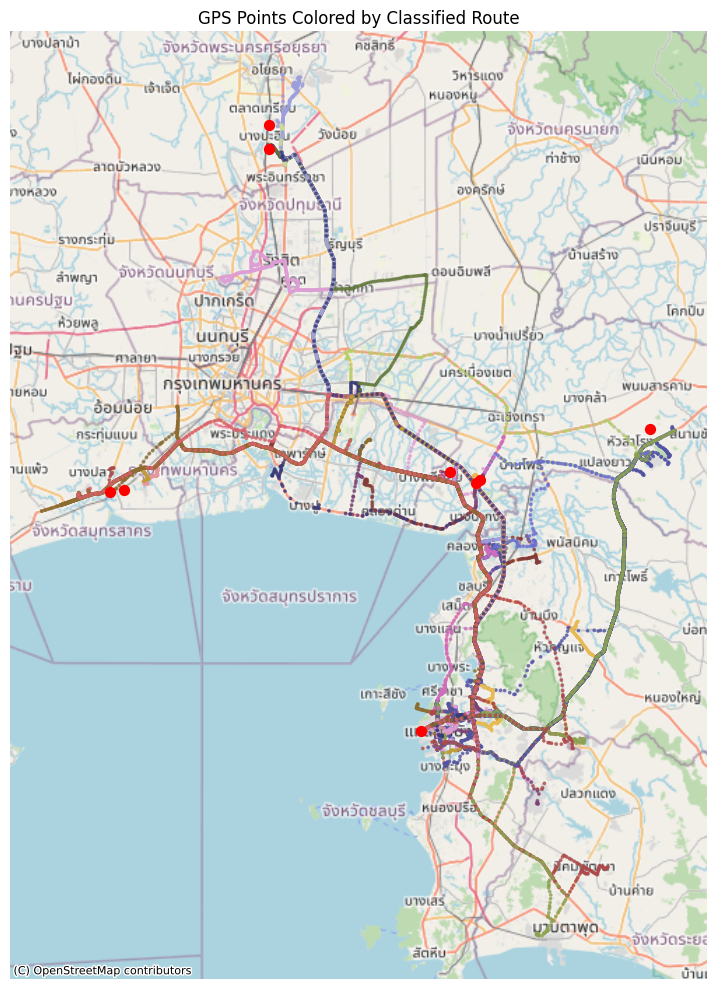

In [135]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# สมมติ df ของคุณชื่อ df_all
df = df_merged2.copy()

# ✅ สร้าง geometry (POINT จาก lon/lat)
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')  # พิกัด WGS84

# ✅ แปลงพิกัดเป็น EPSG:3857 สำหรับ plot ลงแผนที่
gdf = gdf.to_crs(epsg=3857)

# ✅ Plot 1: แยกสีตาม cluster
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='cluster', legend=True, cmap='tab20', markersize=3, alpha=0.7)
gdf2.plot(ax=ax, marker='o', color='red', markersize=50, label='Industrial Estates')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('GPS Points Colored by Cluster KMAEN K=6')
plt.axis('off')
plt.tight_layout()
plt.show()

# ✅ Plot 2: แยกสีตาม classified_route
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='classified_route', legend=0, cmap='tab20b', markersize=3, alpha=0.7)
gdf2.plot(ax=ax, marker='o', color='red', markersize=50, label='Industrial Estates')

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title('GPS Points Colored by Classified Route')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN

# 1. เลือกเฉพาะ columns ที่เป็น binary (roadNumber_)
X = laem_chabang_to_wellgrow.loc[:, laem_chabang_to_wellgrow.columns.str.startswith("roadNumber_")]

# 2. แปลงเป็นตัวเลข และ array
X_array = X.astype(bool).to_numpy()

# 3. คำนวณ Jaccard distance
jaccard_dist = pairwise_distances(X_array, metric='jaccard')
# 3. Clustering ด้วย DBSCAN
db = DBSCAN(metric='precomputed', eps=0.3, min_samples=2)
clusters = db.fit_predict(jaccard_dist)

# 4. เพิ่ม label กลุ่มกลับไปใน DataFrame
laem_chabang_to_wellgrow['route_cluster'] = clusters
laem_chabang_to_wellgrow

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df2 = pd.DataFrame({
    'trip_id': laem_chabang_to_wellgrow['trip_id'],
    'cluster': laem_chabang_to_wellgrow['route_cluster'],
})
pd.set_option('display.max_rows', None)
df2.sort_values('cluster')

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN

# 1. เตรียมเฉพาะ one-hot columns (ถนน)
# กรองเฉพาะ columns ที่เป็นเลข 0/1 (เช่น roadNumber_x)
X = laem_chabang_to_wellgrow.loc[:, laem_chabang_to_wellgrow.columns.str.startswith("roadNumber_")]
X = X.astype(int)

# 2. คำนวณ Jaccard distance (1 - similarity)
jaccard_dist = pairwise_distances(X, metric='jaccard')

# 3. Clustering ด้วย DBSCAN
db = DBSCAN(metric='precomputed', eps=0.3, min_samples=2)
clusters = db.fit_predict(jaccard_dist)

# 4. เพิ่ม label กลุ่มกลับไปใน DataFrame
laem_chabang_to_wellgrow['route_cluster'] = clusters
laem_chabang_to_wellgrow

In [ ]:
gdf_utm

### Rule base

### KMEANs

In [ ]:
from kmodes.kmodes import KModes

km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data_binary)

In [ ]:
from sklearn.cluster import KMeans
# again we know that it has 3 classes
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)
print(y_pred.shape)

#Laem Chabang Port - Wellgrow Industrial Estate

### Hierarchical clustering

In [ ]:

X = laem_chabang_to_wellgrow.iloc[:, 1:]  # Selects all rows, starting from column 1 onward

# Print the shape and dtypes of the DataFrame
print('X:', X.shape)
print('X dtypes:', X.dtypes)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


X_pca = PCA(n_components=5).fit_transform(X)  # Reduce dimensions

kmeans = KMeans(n_clusters=5, random_state=42).fit(X_pca)
cluster_labels = kmeans.labels_
cluster_labels

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def get_linkage(model):
    # needed for visualization
    # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

model = AgglomerativeClustering(linkage='average',
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(X)

# get linkages
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           labels=list(laem_chabang_to_wellgrow['trip_id']),
           leaf_rotation=90,
           leaf_font_size=12,
           ax=ax);

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import numpy as np
# normalize each row to be a unit vector

model = AgglomerativeClustering(linkage='average',
                                distance_threshold=0,
                                n_clusters=None)
model.fit(X)
fig, ax = plt.subplots(figsize=(15, 5))
xticks = np.arange(1, 74)
ax.set_title('Merge distance by merge number')
ax.set_xticks(xticks)
ax.set_xlabel('Merge number')
ax.plot(xticks, model.distances_)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector

model = AgglomerativeClustering(n_clusters=8,
                                linkage='average')
y_pred = model.fit_predict(X)
print('pred:', y_pred)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


X_pca = PCA(n_components=5).fit_transform(X)  # Reduce dimensions

kmeans = KMeans(n_clusters=5, random_state=42).fit(X_pca)
cluster_labels = kmeans.labels_
cluster_labels
df2 = pd.DataFrame({
    'trip_id': laem_chabang_to_wellgrow['trip_id'],
    'cluster': cluster_labels,
})
pd.set_option('display.max_rows', None)
df2.sort_values('cluster')

In [ ]:
df2 = pd.DataFrame({
    'trip_id': laem_chabang_to_wellgrow['trip_id'],
    'cluster': y_pred,
})
pd.set_option('display.max_rows', None)
df2.sort_values('cluster')


In [ ]:
!pip install plotly

In [ ]:
import plotly.graph_objects as go

# Convert to WGS84
polyline_data_wgs84 = polyline_data.to_crs(epsg=4326)

# === MANUAL TRIP ID ===
trip_id_to_show = "036000500000864352049621972"  # Replace with your desired trip_id

# Filter GPS data for the trip
filtered_gdf = gdf_utm[gdf_utm["trip_id"] == trip_id_to_show]

# Get related road IDs from this filtered GPS data
ids_to_plot = filtered_gdf["trip_id"].astype(str).unique()

# Filter polyline data
filtered_poly = polyline_data_wgs84[polyline_data_wgs84['id'].astype(str).isin(ids_to_plot)]

# Create the map
fig = go.Figure()


# Add truck GPS points
fig.add_trace(go.Scattermapbox(
    mode='markers',
    lon=filtered_gdf['lon'],
    lat=filtered_gdf['lat'],
    marker=dict(size=8, color='red', symbol='circle'),
    name=f"Truck Trip {trip_id_to_show}",
    text=filtered_gdf['trip_id']
))

# Center map
if not filtered_gdf.empty:
    center_lat = filtered_gdf['lat'].iloc[0]
    center_lon = filtered_gdf['lon'].iloc[0]
elif not filtered_poly.empty:
    first_geom = filtered_poly.iloc[0]['geometry']
    first_coords = list(first_geom.coords)
    center_lon = sum(pt[0] for pt in first_coords) / len(first_coords)
    center_lat = sum(pt[1] for pt in first_coords) / len(first_coords)
else:
    center_lat, center_lon = 13.75, 100.5  # fallback center

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=11,
    mapbox_center={"lat": center_lat, "lon": center_lon},
    height=600,
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title=f"Trip: {trip_id_to_show}"
)

fig.show(config={"scrollZoom": True})


# sandbox

#### use urbun informatic algorithm

##### Algorithm 6.1

##### Algorithm 6.2